<a href="https://colab.research.google.com/github/mehrotrasan16/time-series-anomaly-detection-methods/blob/sanketm-updatedSTL0.12.0/code/STL_Decomposition_for_Time_Series_Anomalous_Record_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-and-Reading-the-data-files" data-toc-modified-id="Loading-and-Reading-the-data-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Reading the data files</a></span><ul class="toc-item"><li><span><a href="#Additive-STL-Decomposition-using-Seasonal_Decompose" data-toc-modified-id="Additive-STL-Decomposition-using-Seasonal_Decompose-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Additive STL Decomposition using Seasonal_Decompose</a></span></li></ul></li><li><span><a href="#For-other-time-series" data-toc-modified-id="For-other-time-series-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>For other time series</a></span><ul class="toc-item"><li><span><a href="#A2-folder---Synthetic-Time-series-data-with-inserted-outliers" data-toc-modified-id="A2-folder---Synthetic-Time-series-data-with-inserted-outliers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A2 folder - Synthetic Time-series data with inserted outliers</a></span><ul class="toc-item"><li><span><a href="#Standardizing-the-Time-series-and-applying" data-toc-modified-id="Standardizing-the-Time-series-and-applying-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Standardizing the Time series and applying</a></span></li><li><span><a href="#Changing-Manual-threshold-to-k-std-devs" data-toc-modified-id="Changing-Manual-threshold-to-k-std-devs-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Changing Manual threshold to k std devs</a></span></li></ul></li><li><span><a href="#A1-Folder---real-Yahoo-server-traffic-dataset" data-toc-modified-id="A1-Folder---real-Yahoo-server-traffic-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>A1 Folder - real Yahoo server traffic dataset</a></span></li><li><span><a href="#A3-Folder---Synthetic-data-with-outliers-specified" data-toc-modified-id="A3-Folder---Synthetic-data-with-outliers-specified-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>A3 Folder - Synthetic data with outliers specified</a></span></li><li><span><a href="#A4-Folder---Synthetic-data-with-outliers,-changepoints-and-seasonalities." data-toc-modified-id="A4-Folder---Synthetic-data-with-outliers,-changepoints-and-seasonalities.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>A4 Folder - Synthetic data with outliers, changepoints and seasonalities.</a></span></li></ul></li><li><span><a href="#Extracting-useful-features-from-Time-Series" data-toc-modified-id="Extracting-useful-features-from-Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extracting useful features from Time-Series</a></span></li></ul></div>

# Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import glob
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading and Reading the data files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
if not os.path.exists('./data'):
    shutil.copytree('/content/drive/My Drive/Colab Notebooks/tImeSeries-files/data/yahoo','./data')
else:
    pass

In [4]:
start_time = datetime.now()
all_csv = glob.glob(f'/content/data/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(all_csv)} files from disk. Took {end_time-start_time}')

Loaded the paths of 100 files from disk. Took 0:00:00.005617


In [5]:
all_csv[0]

'/content/data/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_10.csv'

In [6]:
all_csv[0].split("/")[6].replace('\\','').split(".")[0]

'synthetic_10'

In [7]:
df= pd.read_csv(all_csv[0])
df

timestamp       value  is_anomaly
0     1416726000  127.699238           0
1     1416729600   23.069614           0
2     1416733200  246.118857           0
3     1416736800  295.937818           0
4     1416740400  264.649986           0
...          ...         ...         ...
1416  1421823600   21.595423           0
1417  1421827200 -246.681048           0
1418  1421830800  102.938096           0
1419  1421834400  310.727447           0
1420  1421838000  251.369372           0

[1421 rows x 3 columns]

In [8]:
df.describe()

timestamp        value   is_anomaly
count  1.421000e+03  1421.000000  1421.000000
mean   1.419282e+09   100.510082     0.002815
std    1.477266e+06   994.547260     0.053000
min    1.416726e+09 -1549.600512     0.000000
25%    1.418004e+09  -868.358025     0.000000
50%    1.419282e+09    99.087404     0.000000
75%    1.420560e+09  1072.422563     0.000000
max    1.421838e+09  2490.312216     1.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1421 non-null   int64  
 1   value       1421 non-null   float64
 2   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


Now we change the timestamp colump from unix seconds after epoch to a human readable date-time stamp   

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
df.index.freq = 'MS'

In [11]:
df

timestamp       value  is_anomaly
0    2014-11-23 07:00:00  127.699238           0
1    2014-11-23 08:00:00   23.069614           0
2    2014-11-23 09:00:00  246.118857           0
3    2014-11-23 10:00:00  295.937818           0
4    2014-11-23 11:00:00  264.649986           0
...                  ...         ...         ...
1416 2015-01-21 07:00:00   21.595423           0
1417 2015-01-21 08:00:00 -246.681048           0
1418 2015-01-21 09:00:00  102.938096           0
1419 2015-01-21 10:00:00  310.727447           0
1420 2015-01-21 11:00:00  251.369372           0

[1421 rows x 3 columns]

In [24]:
df_indexed = df.set_index('timestamp')

print(df_indexed.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1421 entries, 2014-11-23 07:00:00 to 2015-01-21 11:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       1421 non-null   float64
 1   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 33.3 KB
None


## Additive STL Decomposition using Seasonal_Decompose 

These series have the presence of 0 or negative values, which would make them unsuitable for multiplicative decomposition wiout some sort of preprocessing or normalization.

In [25]:
# Additive Decomposition
result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')

In [26]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [27]:
threshold=500
residualdf = result_add.resid
outliers = residualdf[residualdf > threshold]
print(f"File: {all_csv[0]}")
print("threshold: 500")
print("Outliers:")
print(outliers)

File: /content/data/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_10.csv
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1088.668787
2014-12-20 18:00:00    1077.463440
2014-12-30 12:00:00     861.051098
2014-12-30 13:00:00     900.266830
Name: value, dtype: float64


In [28]:
outliers = residualdf[residualdf > threshold]
not_outliers = residualdf[residualdf < threshold]
print(outliers,not_outliers)

timestamp
2014-12-20 17:00:00    1088.668787
2014-12-20 18:00:00    1077.463440
2014-12-30 12:00:00     861.051098
2014-12-30 13:00:00     900.266830
Name: value, dtype: float64 timestamp
2014-11-23 07:00:00   -152.446350
2014-11-23 08:00:00   -310.012543
2014-11-23 09:00:00   -117.188563
2014-11-23 10:00:00   -114.147906
2014-11-23 11:00:00   -168.430971
                          ...    
2015-01-21 07:00:00    300.814090
2015-01-21 08:00:00    -19.165027
2015-01-21 09:00:00    301.462776
2015-01-21 10:00:00    463.707745
2015-01-21 11:00:00    382.588360
Name: value, Length: 1417, dtype: float64


In [31]:
df_indexed, outliers

(                          value  is_anomaly
 timestamp                                  
 2014-11-23 07:00:00  127.699238           0
 2014-11-23 08:00:00   23.069614           0
 2014-11-23 09:00:00  246.118857           0
 2014-11-23 10:00:00  295.937818           0
 2014-11-23 11:00:00  264.649986           0
 ...                         ...         ...
 2015-01-21 07:00:00   21.595423           0
 2015-01-21 08:00:00 -246.681048           0
 2015-01-21 09:00:00  102.938096           0
 2015-01-21 10:00:00  310.727447           0
 2015-01-21 11:00:00  251.369372           0
 
 [1421 rows x 2 columns], timestamp
 2014-12-20 17:00:00    1088.668787
 2014-12-20 18:00:00    1077.463440
 2014-12-30 12:00:00     861.051098
 2014-12-30 13:00:00     900.266830
 Name: value, dtype: float64)

In [17]:
anomalies = df_indexed.join(outliers,on='timestamp',how='inner')
not_anomalies = df_indexed.join(not_outliers,on='timestamp',how='inner')
print(anomalies,not_anomalies)

ValueError: ignored

In [18]:
p = df_indexed.loc[df_indexed['is_anomaly'] == 1]

n = df_indexed.loc[df_indexed['is_anomaly'] == 0]

In [19]:
print(p,n)

                           value  is_anomaly
timestamp                                   
2014-12-20 17:00:00  2490.312216           1
2014-12-20 18:00:00  2490.312216           1
2014-12-30 12:00:00   -83.613394           1
2014-12-30 13:00:00   -83.613394           1                           value  is_anomaly
timestamp                                  
2014-11-23 07:00:00  127.699238           0
2014-11-23 08:00:00   23.069614           0
2014-11-23 09:00:00  246.118857           0
2014-11-23 10:00:00  295.937818           0
2014-11-23 11:00:00  264.649986           0
...                         ...         ...
2015-01-21 07:00:00   21.595423           0
2015-01-21 08:00:00 -246.681048           0
2015-01-21 09:00:00  102.938096           0
2015-01-21 10:00:00  310.727447           0
2015-01-21 11:00:00  251.369372           0

[1417 rows x 2 columns]


In [20]:
truepositives = anomalies.loc[anomalies['is_anomaly'] == 1]

falsepositives = anomalies.loc[anomalies['is_anomaly'] == 0]

NameError: ignored

In [21]:
print(truepositives,falsepositives,sep="\n")

NameError: ignored

In [ ]:
truenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 0]

falsenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 1]

In [22]:
print(truenegatives,falsenegatives,sep="\n")

NameError: ignored

In [ ]:
#Traditional FPR and TPR formmulae
#tpr = truepositives.count()/(truepositives.count() + falsenegatives.count())
#fpr = falsepositives.count()/(falsepositives.count() + truenegatives.count())

#IDEAL Paper based TRP/FPR rates
fpr = len(falsepositives)/len(n)
tpr = len(truepositives)/len(p)
fnr = 1-tpr
tnr = 1-fpr

In [ ]:
print(fpr,tpr,fnr,tnr,sep = "\n")

In [ ]:
precision = len(truepositives)/(tpr + fpr)
recall = tpr/(tpr + fnr)

In [ ]:
print(precision,recall,sep="\n")

In [ ]:
f1 = 2 * ((precision * recall)/(precision + recall))

In [ ]:
print(f1)

Note that the presence of negative and zero values make it such that multiplicative decomposition is not applicable for these time series.

## Trying the new STL API in Stats models v0.12.0

In [ ]:
# https://stackoverflow.com/questions/5226311/installing-specific-package-versions-with-pip
import statsmodels
if not statsmodels.__version__ == '0.12.0':
    print(statsmodels.__version__)
    !pip install -I statsmodels==0.12.0
else:
    pass

In [ ]:
res = statsmodels.tsa.seasonal.STL(df_indexed['value']).fit(inner_iter=10,outer_iter=20)
res.plot()
plt.show()

In [ ]:
res.resid

## TRying the APIs on standardized data

In [33]:
#df_indexed.index.freq = 'MS'
# prepare data for standardization
values = df_indexed.copy()
values = values.drop(columns=['is_anomaly'],axis=1)
#values = values.reshape((len(values), 1))

# train the standardization
scaler2 = StandardScaler()
scaler2 = scaler2.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
# standardize the dataset
standardaized = scaler2.transform(values)
values['std_val'] = standardaized 

ValueError: ignored

In [38]:
values

value   std_val
timestamp                              
2014-11-23 07:00:00  0.027348  0.027348
2014-11-23 08:00:00 -0.077892 -0.077892
2014-11-23 09:00:00  0.146459  0.146459
2014-11-23 10:00:00  0.196568  0.196568
2014-11-23 11:00:00  0.165098  0.165098
...                       ...       ...
2015-01-21 07:00:00 -0.079375 -0.079375
2015-01-21 08:00:00 -0.349218 -0.349218
2015-01-21 09:00:00  0.002442  0.002442
2015-01-21 10:00:00  0.211444  0.211444
2015-01-21 11:00:00  0.151740  0.151740

[1421 rows x 2 columns]

# For other time series

Now Let's try doing this for all the other 99 time series in a loop

## A2 folder - Synthetic Time-series data with inserted outliers

Processing index: 0 of 100



A2Benchmark_A2Benchmarksynthetic_1add_STL


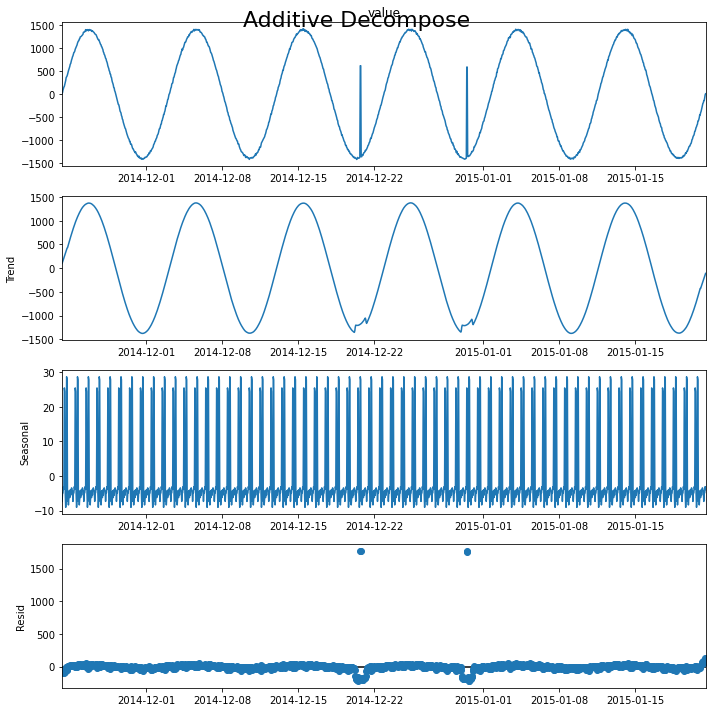



File: A2Benchmarksynthetic_1
threshold: 500
Actual Outliers: 4
                          value  is_anomaly
timestamp                                  
2014-12-20 17:00:00  616.412915           1
2014-12-20 18:00:00  616.412915           1
2014-12-30 12:00:00  587.893627           1
2014-12-30 13:00:00  587.893627           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    1772.222450
2014-12-20 18:00:00    1766.344219
2014-12-30 12:00:00    1760.350798
2014-12-30 13:00:00    1755.882094
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_10add_STL


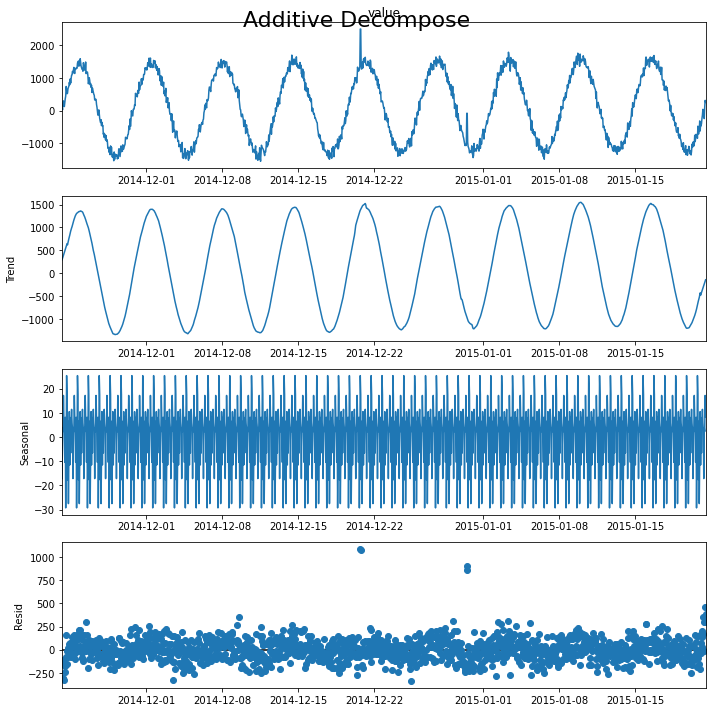



File: A2Benchmarksynthetic_10
threshold: 500
Actual Outliers: 4
                           value  is_anomaly
timestamp                                   
2014-12-20 17:00:00  2490.312216           1
2014-12-20 18:00:00  2490.312216           1
2014-12-30 12:00:00   -83.613394           1
2014-12-30 13:00:00   -83.613394           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    1088.668787
2014-12-20 18:00:00    1077.463440
2014-12-30 12:00:00     861.051098
2014-12-30 13:00:00     900.266830
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_100add_STL


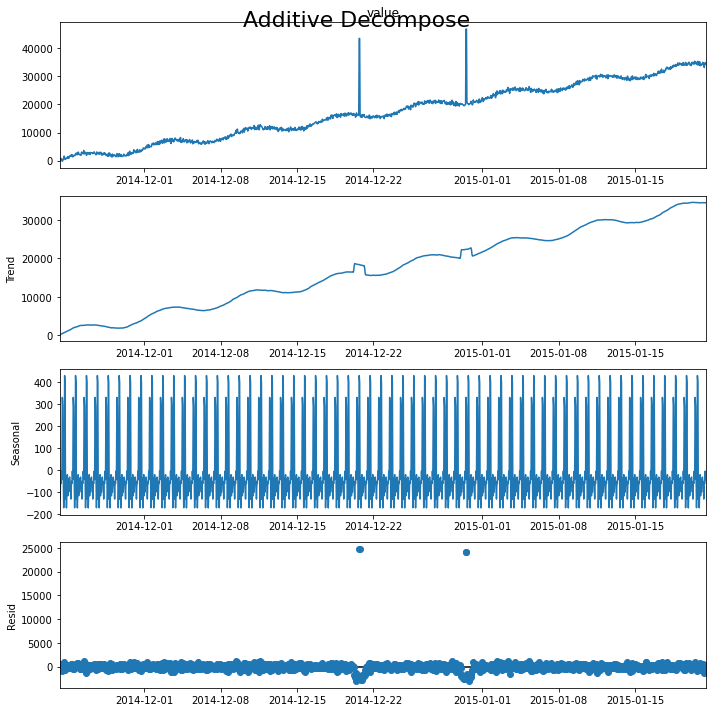



File: A2Benchmarksynthetic_100
threshold: 500
Actual Outliers: 4
                            value  is_anomaly
timestamp                                    
2014-12-20 17:00:00  43520.564531           1
2014-12-20 18:00:00  43520.564531           1
2014-12-30 12:00:00  46884.241246           1
2014-12-30 13:00:00  46884.241246           1
Detected outliers: 172
Outliers:
timestamp
2014-11-23 07:00:00     510.047397
2014-11-23 16:00:00    1023.235688
2014-11-24 09:00:00     525.001815
2014-11-24 19:00:00     564.290616
2014-11-24 21:00:00     714.436649
                          ...     
2015-01-19 22:00:00     698.636921
2015-01-20 11:00:00     888.408219
2015-01-20 14:00:00     565.266072
2015-01-20 22:00:00     825.323223
2015-01-21 05:00:00     574.096495
Name: resid, Length: 172, dtype: float64



A2Benchmark_A2Benchmarksynthetic_11add_STL


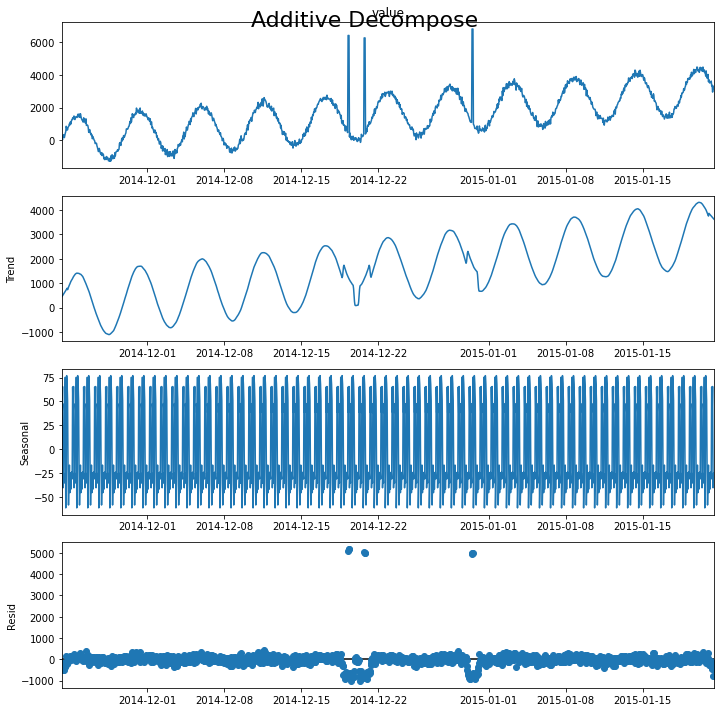



File: A2Benchmarksynthetic_11
threshold: 500
Actual Outliers: 9
                           value  is_anomaly
timestamp                                   
2014-12-19 06:00:00  6424.119302           1
2014-12-19 07:00:00  6424.119302           1
2014-12-19 08:00:00  6424.119302           1
2014-12-20 17:00:00  6273.705277           1
2014-12-20 18:00:00  6273.705277           1
2014-12-20 19:00:00  6273.705277           1
2014-12-30 12:00:00  6819.510433           1
2014-12-30 13:00:00  6819.510433           1
2014-12-30 14:00:00  6819.510433           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    5097.655201
2014-12-19 07:00:00    5170.747173
2014-12-19 08:00:00    5184.493836
2014-12-20 17:00:00    5028.454984
2014-12-20 18:00:00    4999.506151
2014-12-20 19:00:00    4975.421031
2014-12-30 12:00:00    4941.587483
2014-12-30 13:00:00    4999.870276
2014-12-30 14:00:00    5013.014486
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_12add_STL


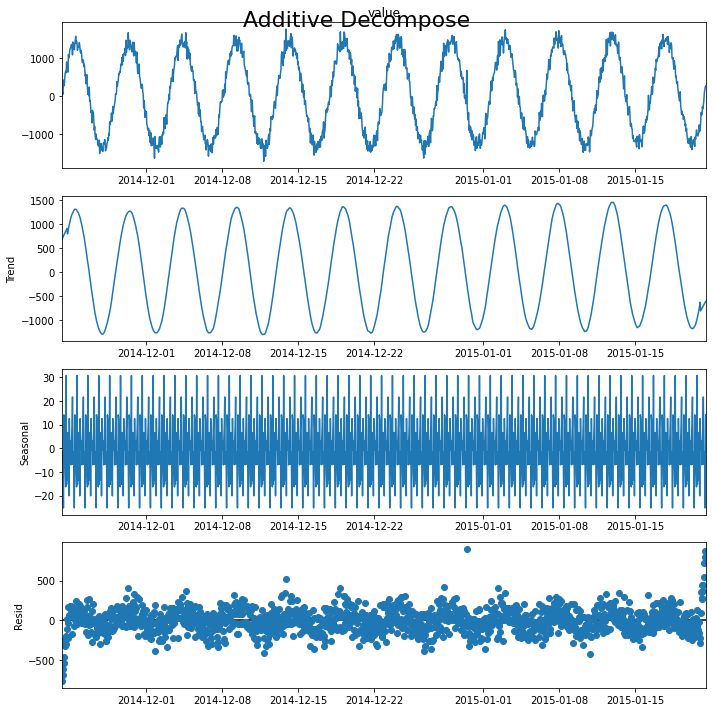



File: A2Benchmarksynthetic_12
threshold: 500
Actual Outliers: 1
                          value  is_anomaly
timestamp                                  
2014-12-30 12:00:00  670.885798           1
Detected outliers: 7
Outliers:
timestamp
2014-12-13 21:00:00    518.229909
2014-12-30 12:00:00    899.590151
2015-01-21 07:00:00    546.091961
2015-01-21 08:00:00    719.254489
2015-01-21 09:00:00    800.955609
2015-01-21 10:00:00    878.920756
2015-01-21 11:00:00    859.589505
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_13add_STL


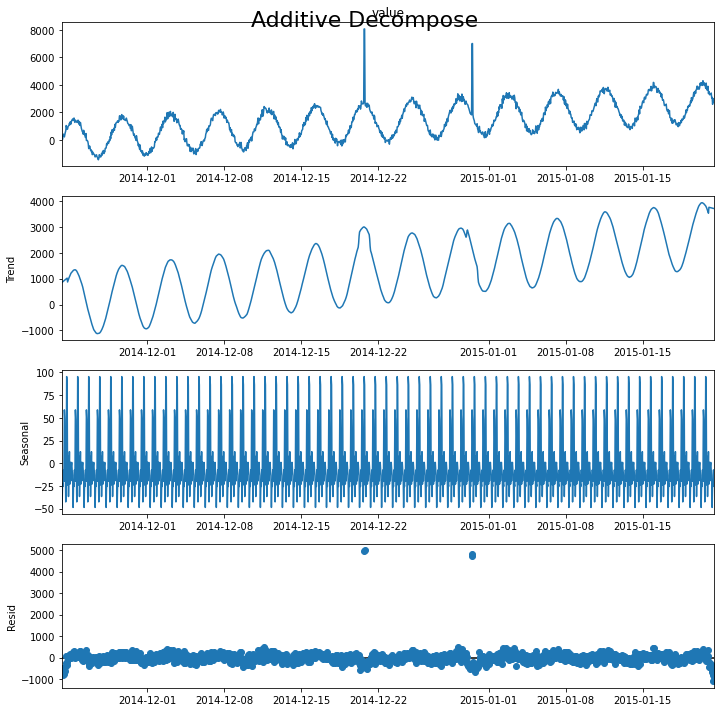



File: A2Benchmarksynthetic_13
threshold: 500
Actual Outliers: 4
                           value  is_anomaly
timestamp                                   
2014-12-20 17:00:00  8056.267028           1
2014-12-20 18:00:00  8056.267028           1
2014-12-30 12:00:00  6995.828286           1
2014-12-30 13:00:00  6995.828286           1
Detected outliers: 5
Outliers:
timestamp
2014-12-20 17:00:00    4966.348775
2014-12-20 18:00:00    4986.096620
2014-12-29 05:00:00     505.866852
2014-12-30 12:00:00    4733.056532
2014-12-30 13:00:00    4821.207605
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_14add_STL


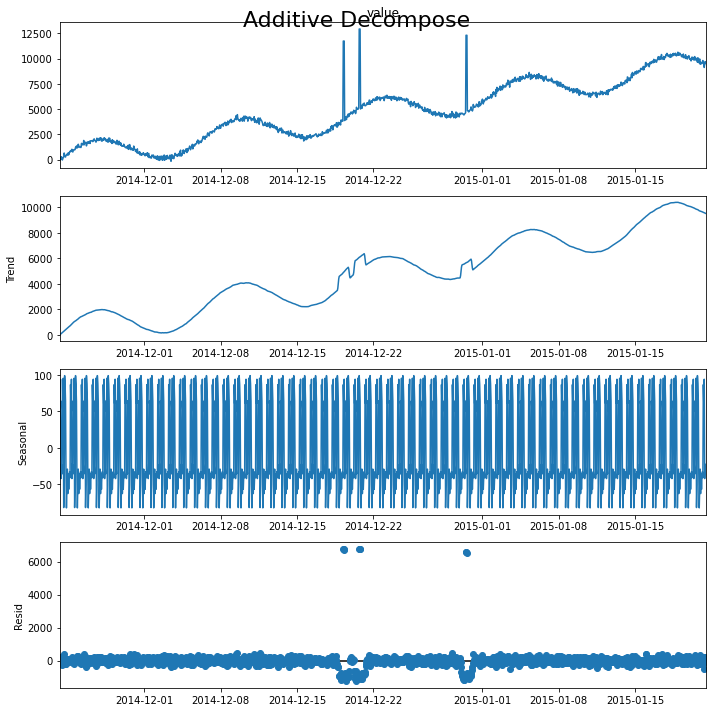



File: A2Benchmarksynthetic_14
threshold: 500
Actual Outliers: 9
                            value  is_anomaly
timestamp                                    
2014-12-19 06:00:00  11741.659149           1
2014-12-19 07:00:00  11741.659149           1
2014-12-19 08:00:00  11741.659149           1
2014-12-20 17:00:00  12933.153180           1
2014-12-20 18:00:00  12933.153180           1
2014-12-20 19:00:00  12933.153180           1
2014-12-30 12:00:00  12313.689897           1
2014-12-30 13:00:00  12313.689897           1
2014-12-30 14:00:00  12313.689897           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    6769.365597
2014-12-19 07:00:00    6762.466346
2014-12-19 08:00:00    6692.283881
2014-12-20 17:00:00    6760.127091
2014-12-20 18:00:00    6749.287440
2014-12-20 19:00:00    6749.407831
2014-12-30 12:00:00    6600.879257
2014-12-30 13:00:00    6598.191189
2014-12-30 14:00:00    6539.964757
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_15add_ST

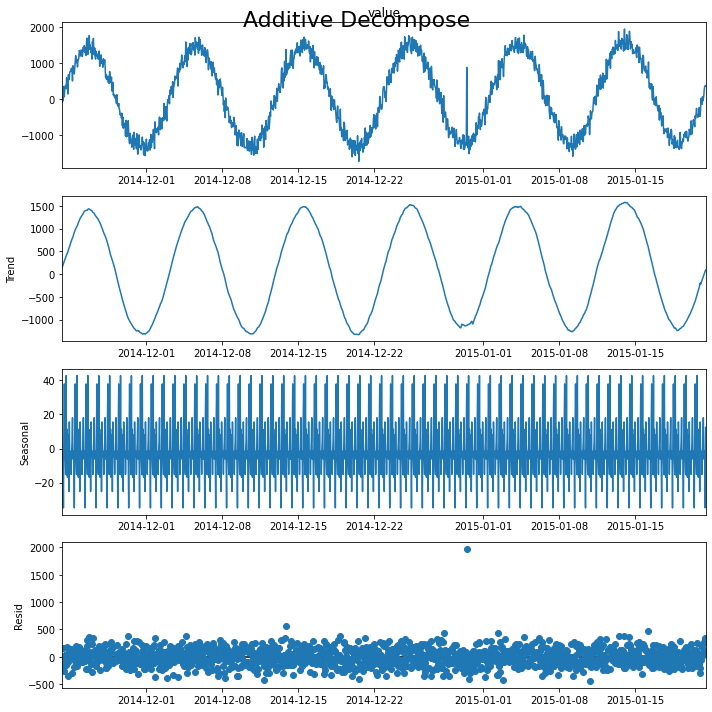



File: A2Benchmarksynthetic_15
threshold: 500
Actual Outliers: 1
                          value  is_anomaly
timestamp                                  
2014-12-30 12:00:00  884.662693           1
Detected outliers: 2
Outliers:
timestamp
2014-12-13 21:00:00     555.685017
2014-12-30 12:00:00    1973.810656
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_16add_STL


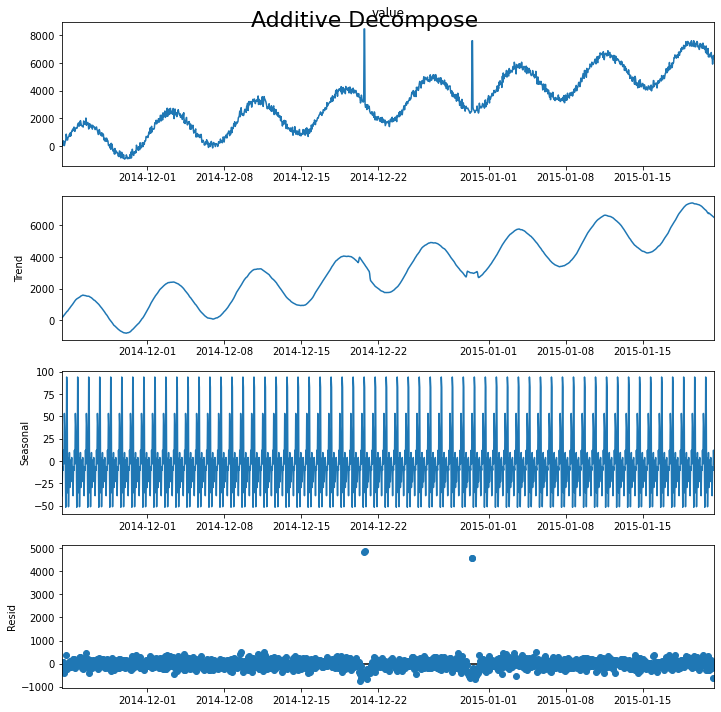



File: A2Benchmarksynthetic_16
threshold: 500
Actual Outliers: 4
                           value  is_anomaly
timestamp                                   
2014-12-20 17:00:00  8470.624612           1
2014-12-20 18:00:00  8470.624612           1
2014-12-30 12:00:00  7612.932509           1
2014-12-30 13:00:00  7612.932509           1
Detected outliers: 7
Outliers:
timestamp
2014-12-09 13:00:00     514.105247
2014-12-11 15:00:00     513.102094
2014-12-20 17:00:00    4816.755116
2014-12-20 18:00:00    4877.904403
2014-12-30 12:00:00    4569.638451
2014-12-30 13:00:00    4593.284562
2015-01-05 07:00:00     502.952377
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_17add_STL


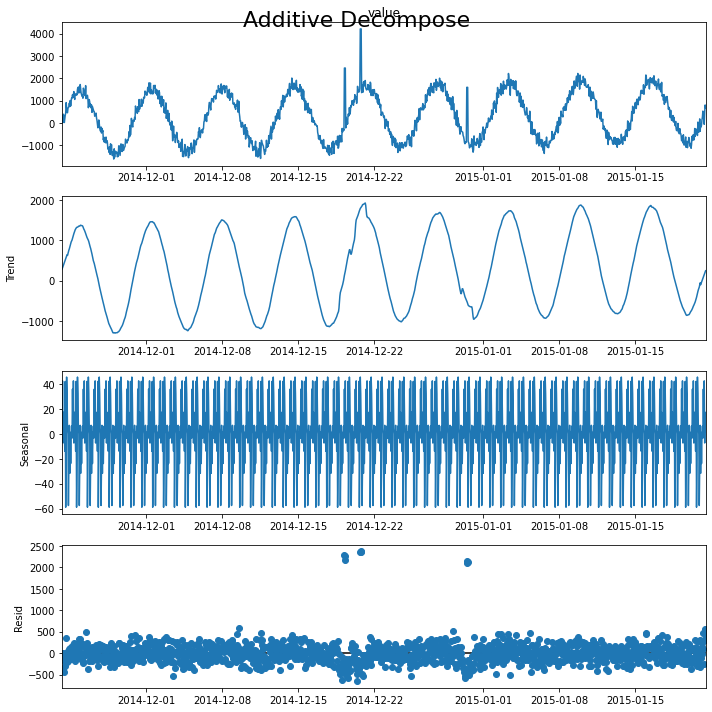



File: A2Benchmarksynthetic_17
threshold: 500
Actual Outliers: 9
                           value  is_anomaly
timestamp                                   
2014-12-19 06:00:00  2455.065872           1
2014-12-19 07:00:00  2455.065872           1
2014-12-19 08:00:00  2455.065872           1
2014-12-20 17:00:00  4206.886469           1
2014-12-20 18:00:00  4206.886469           1
2014-12-20 19:00:00  4206.886469           1
2014-12-30 12:00:00  1591.137711           1
2014-12-30 13:00:00  1591.137711           1
2014-12-30 14:00:00  1591.137711           1
Detected outliers: 12
Outliers:
timestamp
2014-12-09 13:00:00     594.849188
2014-12-19 06:00:00    2287.358933
2014-12-19 07:00:00    2271.483046
2014-12-19 08:00:00    2174.836732
2014-12-20 17:00:00    2366.885292
2014-12-20 18:00:00    2364.824872
2014-12-20 19:00:00    2376.670578
2014-12-29 05:00:00     521.451642
2014-12-30 12:00:00    2094.114192
2014-12-30 13:00:00    2141.610494
2014-12-30 14:00:00    2120.512364
2015-01-21 1

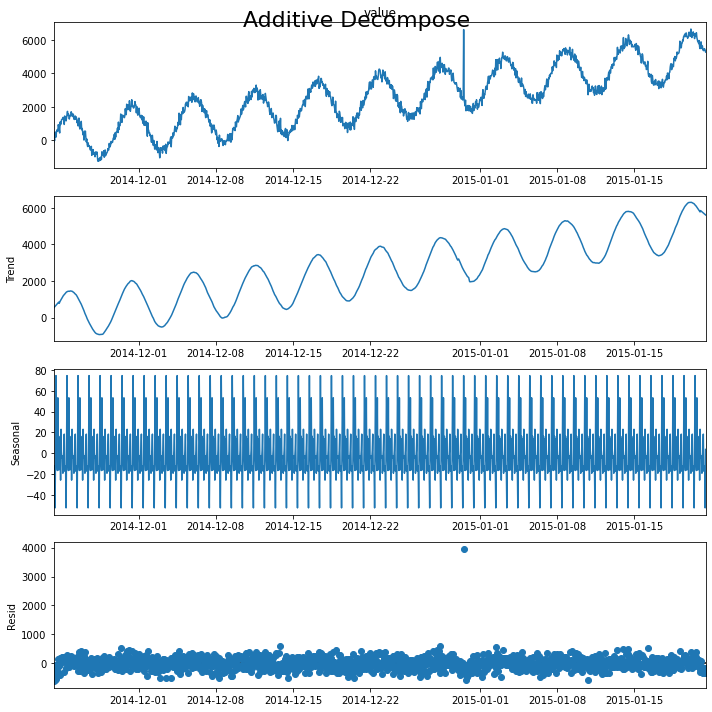



File: A2Benchmarksynthetic_18
threshold: 500
Actual Outliers: 1
                           value  is_anomaly
timestamp                                   
2014-12-30 12:00:00  6622.489879           1
Detected outliers: 6
Outliers:
timestamp
2014-11-29 09:00:00     519.952196
2014-12-13 21:00:00     588.323442
2014-12-28 09:00:00     613.806239
2014-12-30 12:00:00    3954.592070
2015-01-02 10:00:00     566.404252
2015-01-16 05:00:00     523.896653
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_19add_STL


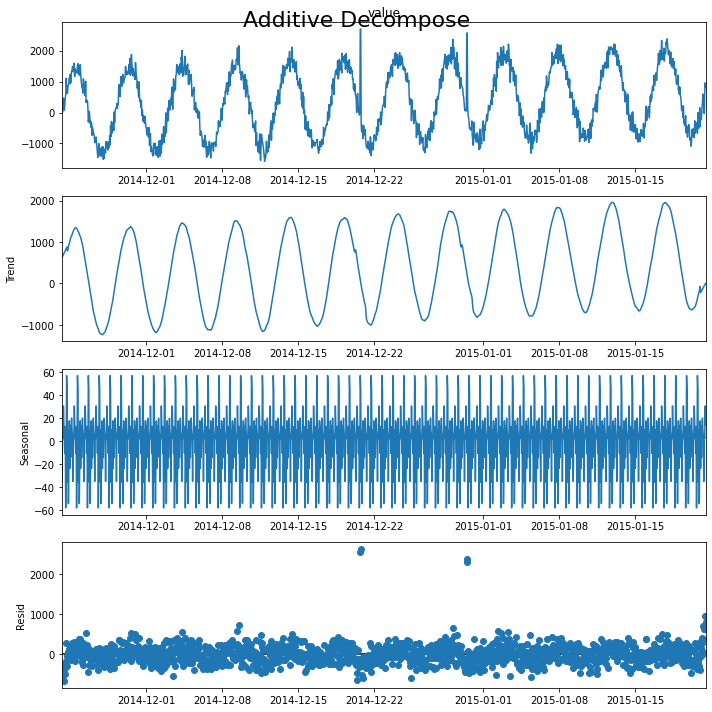



File: A2Benchmarksynthetic_19
threshold: 500
Actual Outliers: 4
                           value  is_anomaly
timestamp                                   
2014-12-20 17:00:00  2701.113338           1
2014-12-20 18:00:00  2701.113338           1
2014-12-30 12:00:00  2570.985949           1
2014-12-30 13:00:00  2570.985949           1
Detected outliers: 21
Outliers:
timestamp
2014-11-25 11:00:00     520.980222
2014-11-29 16:00:00     539.124376
2014-11-30 01:00:00     515.787585
2014-12-04 08:00:00     541.564093
2014-12-09 10:00:00     570.088062
2014-12-09 13:00:00     738.338568
2014-12-14 10:00:00     502.951752
2014-12-20 17:00:00    2543.158313
2014-12-20 18:00:00    2630.254526
2014-12-29 05:00:00     646.398768
2014-12-30 12:00:00    2303.094641
2014-12-30 13:00:00    2389.841862
2015-01-02 08:00:00     569.731602
2015-01-02 15:00:00     529.947855
2015-01-03 08:00:00     561.546764
2015-01-17 10:00:00     509.745124
2015-01-21 05:00:00     704.575155
2015-01-21 07:00:00     617

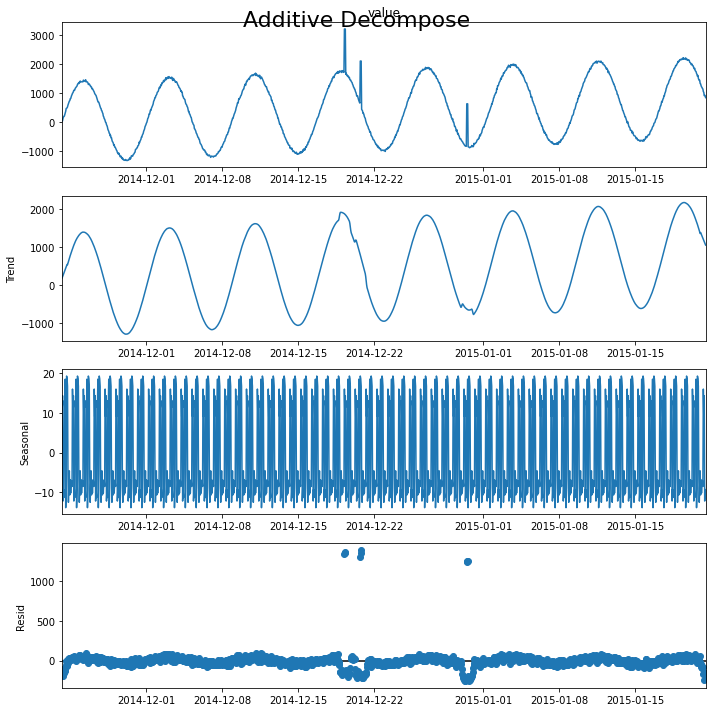



File: A2Benchmarksynthetic_2
threshold: 500
Actual Outliers: 9
                           value  is_anomaly
timestamp                                   
2014-12-19 06:00:00  3225.596069           1
2014-12-19 07:00:00  3225.596069           1
2014-12-19 08:00:00  3225.596069           1
2014-12-20 17:00:00  2114.071753           1
2014-12-20 18:00:00  2114.071753           1
2014-12-20 19:00:00  2114.071753           1
2014-12-30 12:00:00   631.206140           1
2014-12-30 13:00:00   631.206140           1
2014-12-30 14:00:00   631.206140           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    1336.141758
2014-12-19 07:00:00    1354.743755
2014-12-19 08:00:00    1362.022586
2014-12-20 17:00:00    1301.462227
2014-12-20 18:00:00    1347.539611
2014-12-20 19:00:00    1394.729580
2014-12-30 12:00:00    1244.776908
2014-12-30 13:00:00    1255.079829
2014-12-30 14:00:00    1255.735410
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_20add_STL


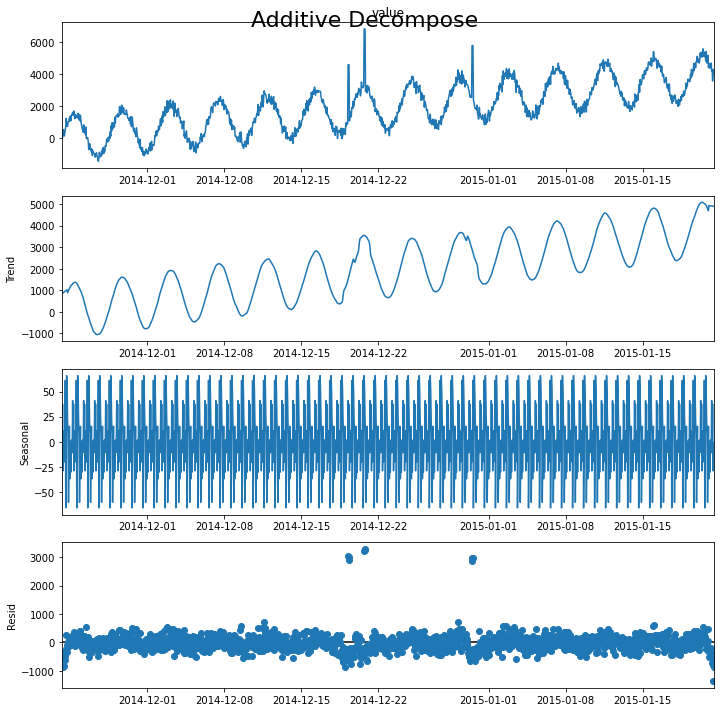



File: A2Benchmarksynthetic_20
threshold: 500
Actual Outliers: 9
                           value  is_anomaly
timestamp                                   
2014-12-19 06:00:00  4595.357487           1
2014-12-19 07:00:00  4595.357487           1
2014-12-19 08:00:00  4595.357487           1
2014-12-20 17:00:00  6838.500015           1
2014-12-20 18:00:00  6838.500015           1
2014-12-20 19:00:00  6838.500015           1
2014-12-30 12:00:00  5794.273164           1
2014-12-30 13:00:00  5794.273164           1
2014-12-30 14:00:00  5794.273164           1
Detected outliers: 24
Outliers:
timestamp
2014-11-25 11:00:00     551.249943
2014-11-29 16:00:00     510.570394
2014-12-02 20:00:00     532.226013
2014-12-09 13:00:00     565.058796
2014-12-11 02:00:00     501.878878
2014-12-11 11:00:00     525.334884
2014-12-11 15:00:00     707.656900
2014-12-11 16:00:00     517.871707
2014-12-19 06:00:00    3032.112482
2014-12-19 07:00:00    3012.748989
2014-12-19 08:00:00    2888.293381
2014-12-20 1

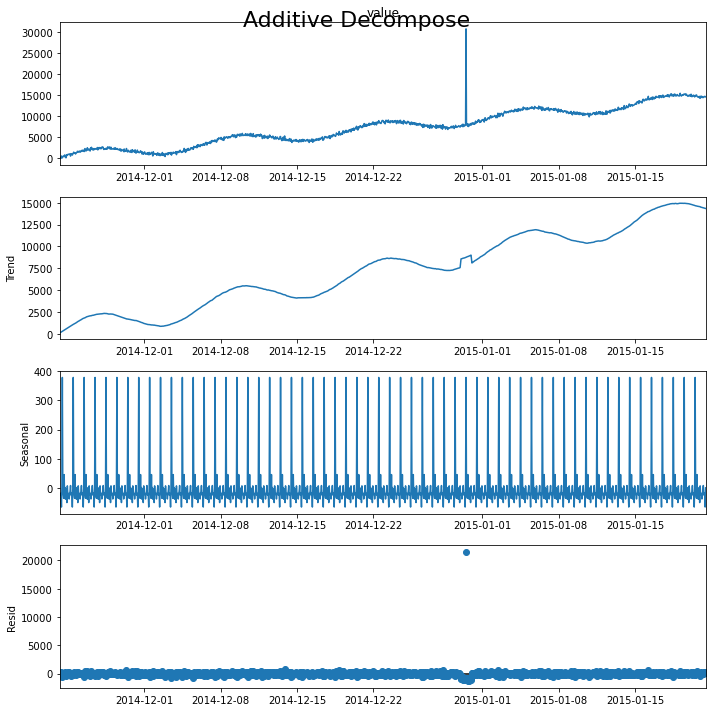



File: A2Benchmarksynthetic_21
threshold: 500
Actual Outliers: 1
                            value  is_anomaly
timestamp                                    
2014-12-30 12:00:00  30692.054083           1
Detected outliers: 12
Outliers:
timestamp
2014-11-29 09:00:00      571.813444
2014-12-01 20:00:00      505.341062
2014-12-13 21:00:00      767.416955
2014-12-18 21:00:00      563.583673
2014-12-21 04:00:00      543.353804
2014-12-28 09:00:00      623.978209
2014-12-30 12:00:00    21550.896677
2015-01-02 10:00:00      609.646952
2015-01-06 04:00:00      504.264110
2015-01-13 11:00:00      502.757588
2015-01-14 00:00:00      514.009796
2015-01-16 05:00:00      665.962688
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_22add_STL


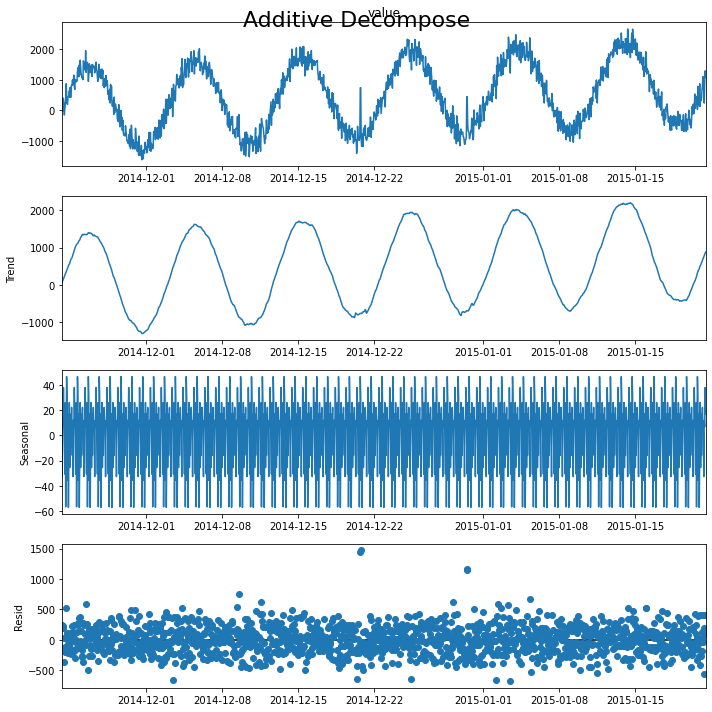



File: A2Benchmarksynthetic_22
threshold: 500
Actual Outliers: 4
                          value  is_anomaly
timestamp                                  
2014-12-20 17:00:00  737.743951           1
2014-12-20 18:00:00  737.743951           1
2014-12-30 12:00:00  446.493838           1
2014-12-30 13:00:00  446.493838           1
Detected outliers: 19
Outliers:
timestamp
2014-11-23 16:00:00     527.858507
2014-11-25 11:00:00     585.352726
2014-12-04 08:00:00     529.410373
2014-12-09 10:00:00     532.622709
2014-12-09 13:00:00     750.488923
2014-12-11 15:00:00     626.410056
2014-12-20 17:00:00    1446.657906
2014-12-20 18:00:00    1468.329618
2014-12-29 05:00:00     626.159432
2014-12-30 12:00:00    1141.111214
2014-12-30 13:00:00    1161.599383
2014-12-31 04:00:00     510.494395
2015-01-02 08:00:00     587.830825
2015-01-02 15:00:00     518.029876
2015-01-03 08:00:00     567.680685
2015-01-05 07:00:00     672.500216
2015-01-14 07:00:00     523.437345
2015-01-15 23:00:00     524.27878

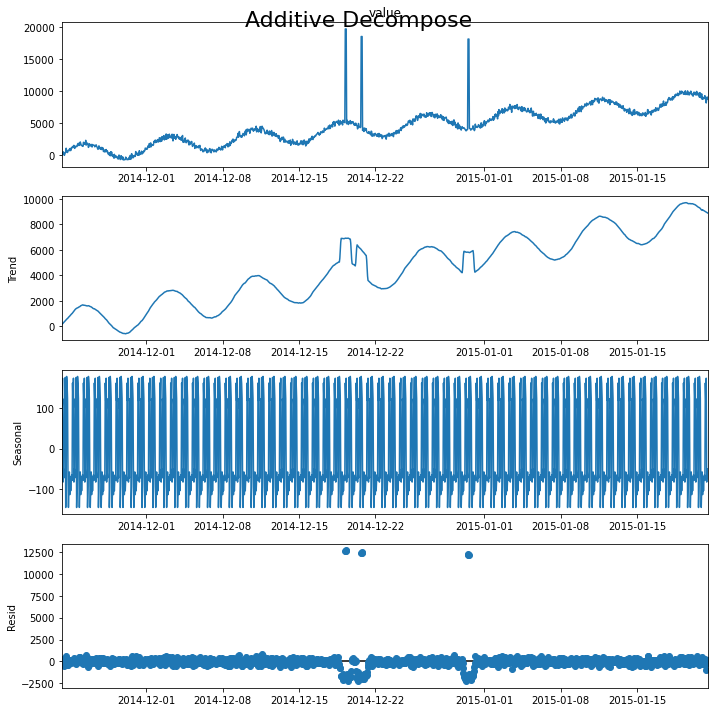



File: A2Benchmarksynthetic_23
threshold: 500
Actual Outliers: 9
                            value  is_anomaly
timestamp                                    
2014-12-19 06:00:00  19740.188389           1
2014-12-19 07:00:00  19740.188389           1
2014-12-19 08:00:00  19740.188389           1
2014-12-20 17:00:00  18553.830928           1
2014-12-20 18:00:00  18553.830928           1
2014-12-20 19:00:00  18553.830928           1
2014-12-30 12:00:00  18153.623148           1
2014-12-30 13:00:00  18153.623148           1
2014-12-30 14:00:00  18153.623148           1
Detected outliers: 46
Outliers:
timestamp
2014-11-23 16:00:00      609.412803
2014-11-25 11:00:00      713.714995
2014-11-29 16:00:00      584.137552
2014-11-30 01:00:00      597.544468
2014-11-30 09:00:00      500.131602
2014-12-02 15:00:00      519.078276
2014-12-02 20:00:00      601.428111
2014-12-03 00:00:00      516.338877
2014-12-03 03:00:00      519.186079
2014-12-03 20:00:00      503.576514
2014-12-05 22:00:00      5

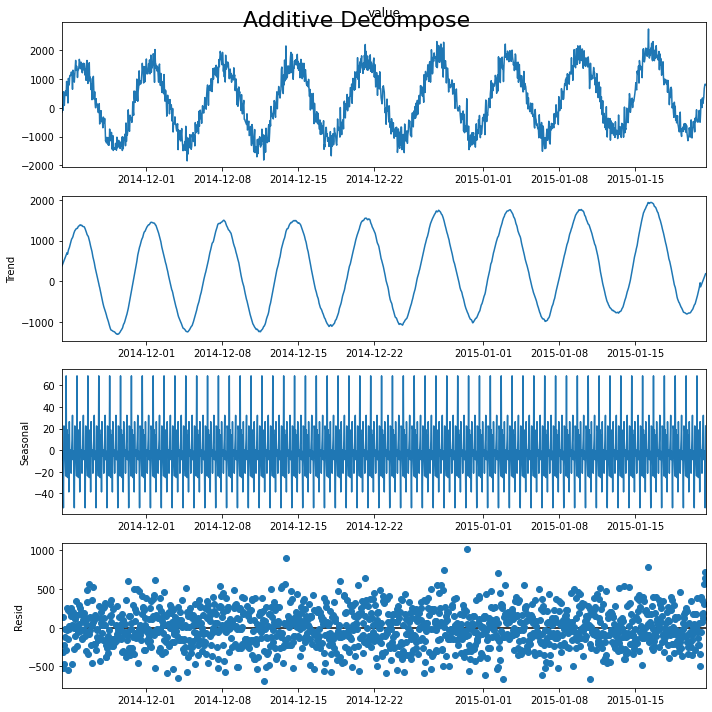



File: A2Benchmarksynthetic_24
threshold: 500
Actual Outliers: 1
                          value  is_anomaly
timestamp                                  
2014-12-30 12:00:00  313.432529           1
Detected outliers: 33
Outliers:
timestamp
2014-11-25 19:00:00     571.583155
2014-11-26 04:00:00     532.006943
2014-11-29 09:00:00     606.899393
2014-11-29 22:00:00     501.517400
2014-11-30 04:00:00     505.898106
2014-12-01 20:00:00     622.932354
2014-12-04 16:00:00     514.315289
2014-12-07 20:00:00     540.317676
2014-12-12 12:00:00     500.819043
2014-12-13 11:00:00     513.673147
2014-12-13 12:00:00     544.776760
2014-12-13 18:00:00     564.659184
2014-12-13 21:00:00     904.481717
2014-12-18 21:00:00     598.614684
2014-12-20 11:00:00     548.280040
2014-12-21 04:00:00     642.366090
2014-12-27 18:00:00     558.538346
2014-12-28 03:00:00     548.608256
2014-12-28 09:00:00     752.395125
2014-12-30 12:00:00    1014.024092
2015-01-02 10:00:00     703.877103
2015-01-03 01:00:00     5

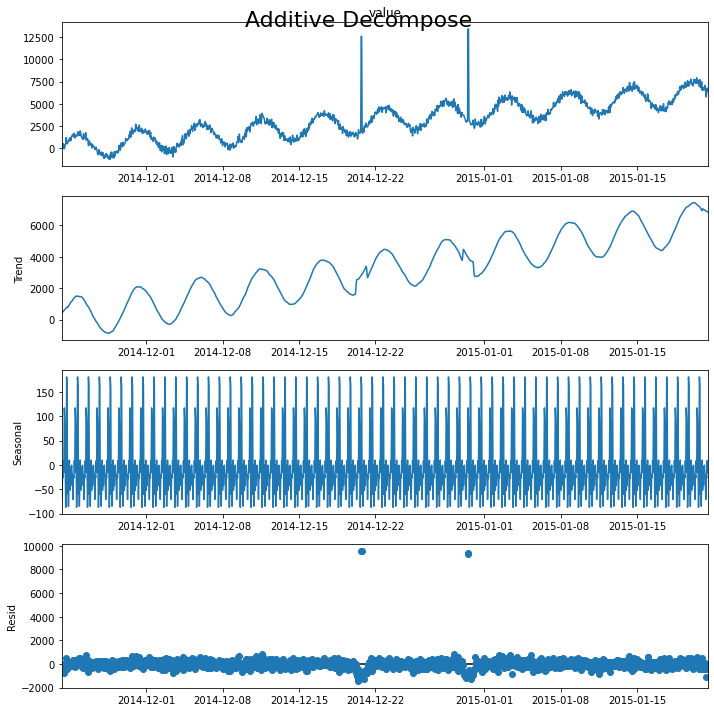



File: A2Benchmarksynthetic_25
threshold: 500
Actual Outliers: 4
                            value  is_anomaly
timestamp                                    
2014-12-20 17:00:00  12575.790049           1
2014-12-20 18:00:00  12575.790049           1
2014-12-30 12:00:00  13405.000517           1
2014-12-30 13:00:00  13405.000517           1
Detected outliers: 38
Outliers:
timestamp
2014-11-23 16:00:00     509.045420
2014-11-25 11:00:00     720.736139
2014-11-29 16:00:00     654.299623
2014-11-30 01:00:00     678.242954
2014-11-30 09:00:00     576.130935
2014-12-01 07:00:00     579.153078
2014-12-04 08:00:00     598.625072
2014-12-05 22:00:00     606.089905
2014-12-09 10:00:00     604.746528
2014-12-09 13:00:00     697.568592
2014-12-11 02:00:00     637.676085
2014-12-11 11:00:00     600.984781
2014-12-11 15:00:00     826.262024
2014-12-11 16:00:00     586.495840
2014-12-14 10:00:00     501.471280
2014-12-20 17:00:00    9570.089466
2014-12-20 18:00:00    9557.725565
2014-12-23 06:00:00  

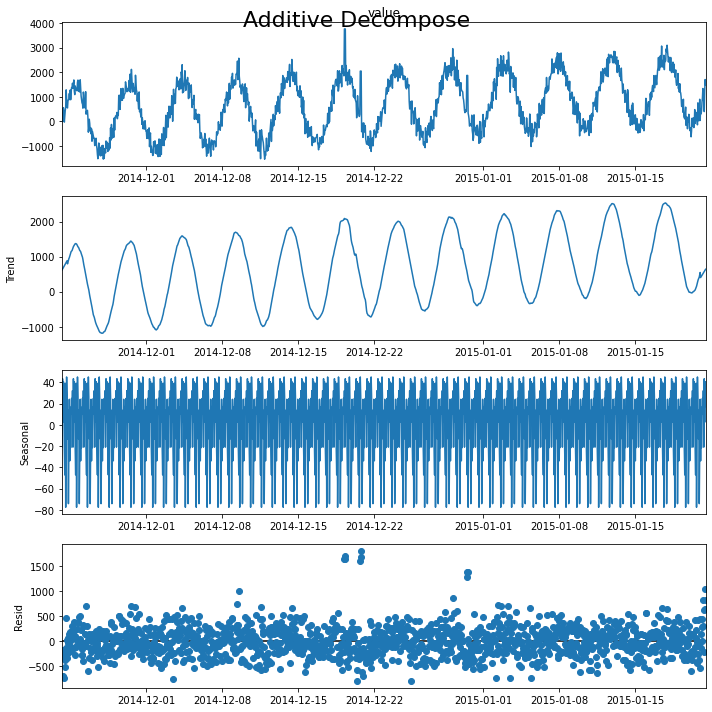



File: A2Benchmarksynthetic_26
threshold: 500
Actual Outliers: 9
                           value  is_anomaly
timestamp                                   
2014-12-19 06:00:00  3755.844471           1
2014-12-19 07:00:00  3755.844471           1
2014-12-19 08:00:00  3755.844471           1
2014-12-20 17:00:00  2041.956620           1
2014-12-20 18:00:00  2041.956620           1
2014-12-20 19:00:00  2041.956620           1
2014-12-30 12:00:00  1865.879092           1
2014-12-30 13:00:00  1865.879092           1
2014-12-30 14:00:00  1865.879092           1
Detected outliers: 53
Outliers:
timestamp
2014-11-24 23:00:00     502.516154
2014-11-25 11:00:00     701.173642
2014-11-28 13:00:00     505.087059
2014-11-29 13:00:00     550.077490
2014-11-29 16:00:00     702.522741
2014-11-30 01:00:00     681.600866
2014-11-30 09:00:00     530.893397
2014-12-02 20:00:00     513.522555
2014-12-03 20:00:00     515.481229
2014-12-04 08:00:00     669.627722
2014-12-05 22:00:00     507.494970
2014-12-09 1

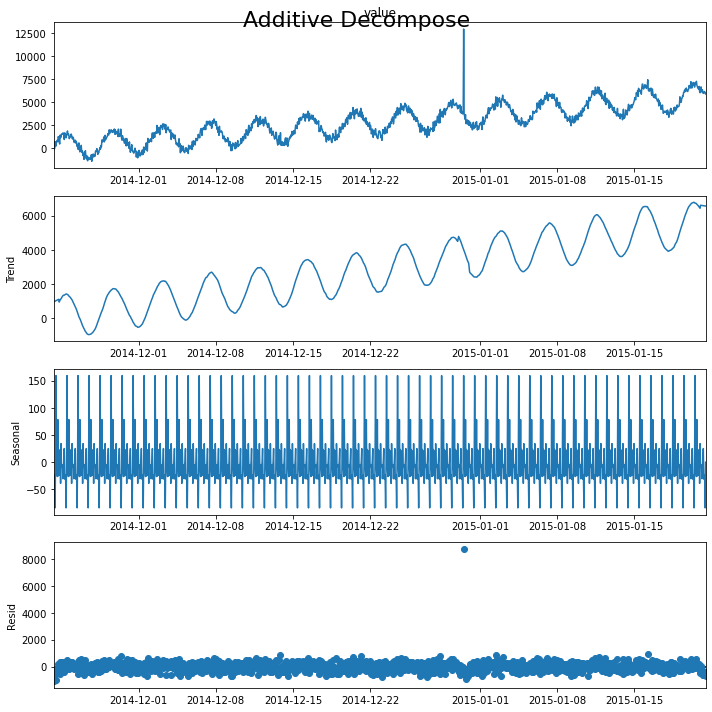



File: A2Benchmarksynthetic_27
threshold: 500
Actual Outliers: 1
                            value  is_anomaly
timestamp                                    
2014-12-30 12:00:00  12933.963939           1
Detected outliers: 53
Outliers:
timestamp
2014-11-25 19:00:00     547.450670
2014-11-29 04:00:00     543.954187
2014-11-29 09:00:00     808.240910
2014-11-29 22:00:00     547.990314
2014-11-30 04:00:00     510.958322
2014-12-01 20:00:00     602.401001
2014-12-02 16:00:00     577.045630
2014-12-04 16:00:00     570.078018
2014-12-07 04:00:00     519.970908
2014-12-07 20:00:00     652.033357
2014-12-07 21:00:00     503.454056
2014-12-08 01:00:00     532.969908
2014-12-11 00:00:00     517.559418
2014-12-11 16:00:00     600.533456
2014-12-12 12:00:00     535.330507
2014-12-13 11:00:00     508.465800
2014-12-13 21:00:00     858.316805
2014-12-16 09:00:00     613.015504
2014-12-17 08:00:00     518.804732
2014-12-18 21:00:00     606.035447
2014-12-20 11:00:00     708.851679
2014-12-21 04:00:00

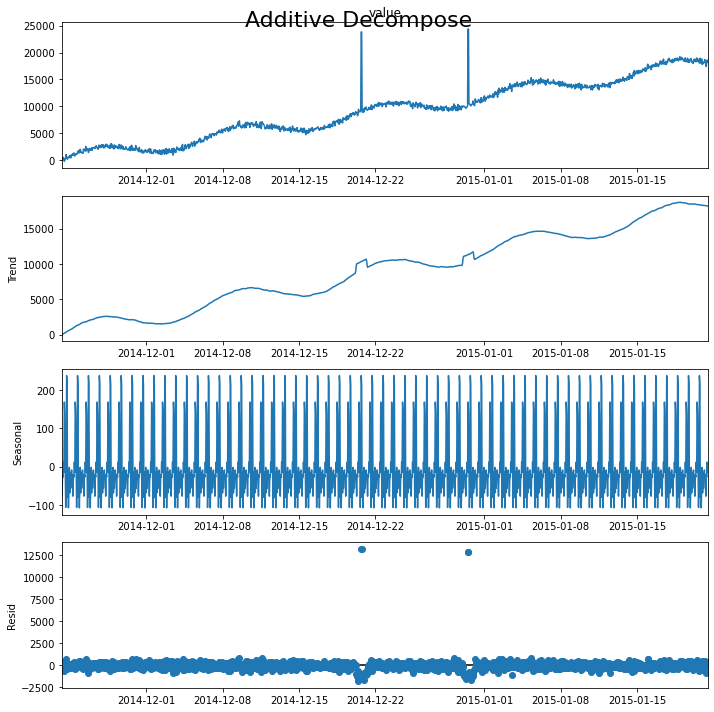



File: A2Benchmarksynthetic_28
threshold: 500
Actual Outliers: 4
                            value  is_anomaly
timestamp                                    
2014-12-20 17:00:00  23827.991635           1
2014-12-20 18:00:00  23827.991635           1
2014-12-30 12:00:00  24372.452465           1
2014-12-30 13:00:00  24372.452465           1
Detected outliers: 59
Outliers:
timestamp
2014-11-23 16:00:00      733.696088
2014-11-25 11:00:00      763.023418
2014-11-29 16:00:00      684.773270
2014-11-30 01:00:00      692.094102
2014-11-30 09:00:00      559.669203
2014-12-01 07:00:00      599.291925
2014-12-02 15:00:00      508.485578
2014-12-02 20:00:00      607.385130
2014-12-03 00:00:00      501.566847
2014-12-03 03:00:00      504.031142
2014-12-04 08:00:00      677.156019
2014-12-05 22:00:00      608.281826
2014-12-09 10:00:00      749.462802
2014-12-09 13:00:00      812.027728
2014-12-10 03:00:00      516.206885
2014-12-10 06:00:00      514.205830
2014-12-11 02:00:00      666.803711
2014

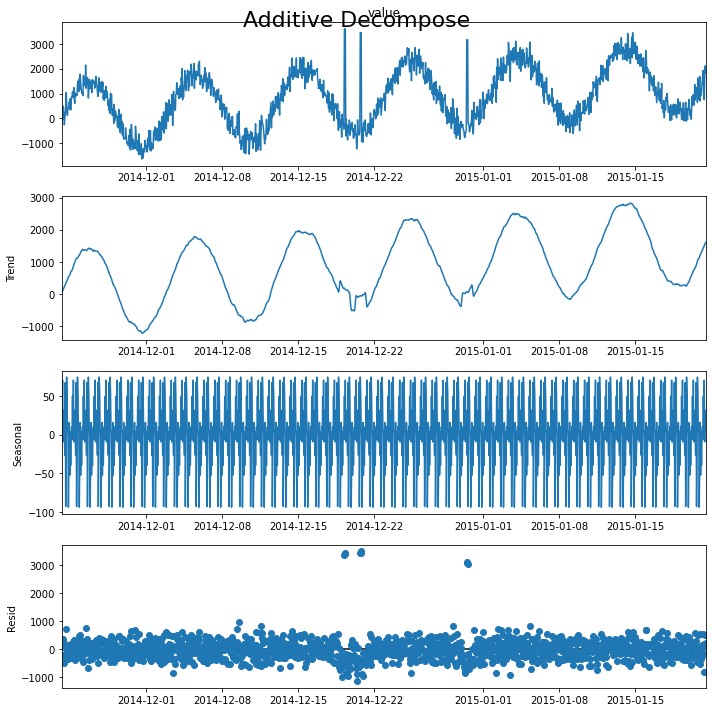



File: A2Benchmarksynthetic_29
threshold: 500
Actual Outliers: 9
                           value  is_anomaly
timestamp                                   
2014-12-19 06:00:00  3599.566321           1
2014-12-19 07:00:00  3599.566321           1
2014-12-19 08:00:00  3599.566321           1
2014-12-20 17:00:00  3449.742128           1
2014-12-20 18:00:00  3449.742128           1
2014-12-20 19:00:00  3449.742128           1
2014-12-30 12:00:00  3161.305435           1
2014-12-30 13:00:00  3161.305435           1
2014-12-30 14:00:00  3161.305435           1
Detected outliers: 70
Outliers:
timestamp
2014-11-23 16:00:00    724.146516
2014-11-24 23:00:00    503.832489
2014-11-25 11:00:00    781.999790
2014-11-29 16:00:00    671.692031
2014-11-30 01:00:00    677.537136
                          ...    
2015-01-20 11:00:00    577.088336
2015-01-20 18:00:00    511.458008
2015-01-20 22:00:00    549.819676
2015-01-21 05:00:00    536.676871
2015-01-21 10:00:00    517.549910
Name: resid, Length: 70

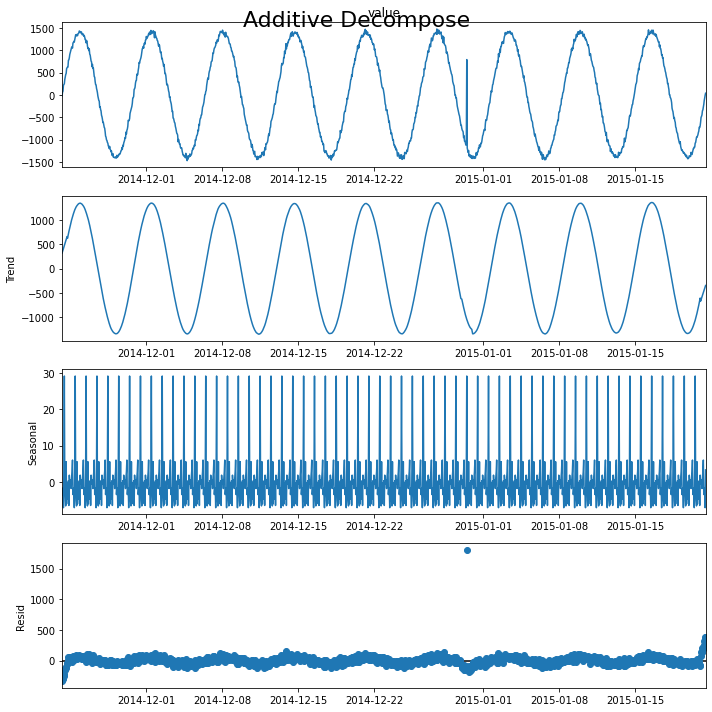



File: A2Benchmarksynthetic_3
threshold: 500
Actual Outliers: 1
                          value  is_anomaly
timestamp                                  
2014-12-30 12:00:00  791.823067           1
Detected outliers: 1
Outliers:
timestamp
2014-12-30 12:00:00    1810.40052
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_30add_STL


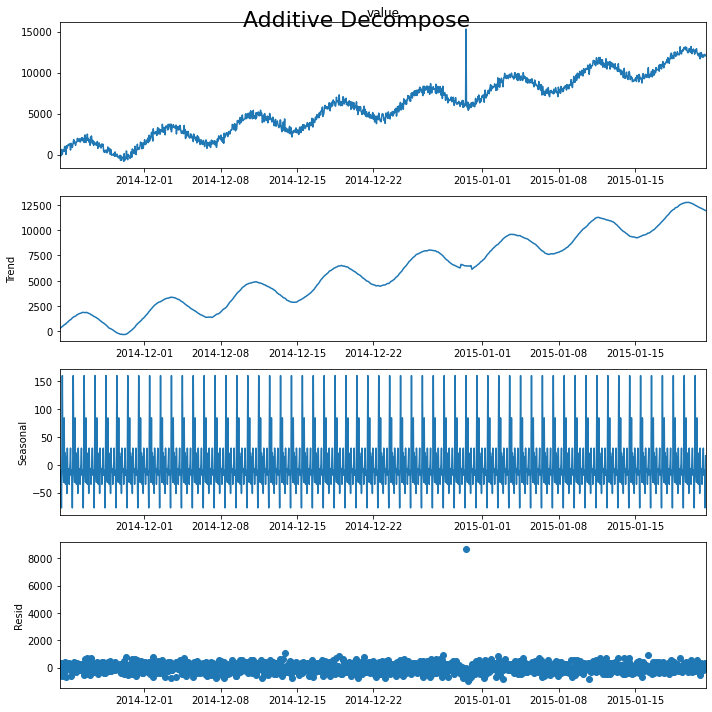



File: A2Benchmarksynthetic_30
threshold: 500
Actual Outliers: 1
                            value  is_anomaly
timestamp                                    
2014-12-30 12:00:00  15325.861692           1
Detected outliers: 70
Outliers:
timestamp
2014-11-25 14:00:00    599.521416
2014-11-25 19:00:00    705.495365
2014-11-26 04:00:00    675.838168
2014-11-29 09:00:00    760.974505
2014-11-29 22:00:00    595.097335
                          ...    
2015-01-16 05:00:00    890.478879
2015-01-18 07:00:00    533.735800
2015-01-19 03:00:00    666.928410
2015-01-20 03:00:00    537.410591
2015-01-20 15:00:00    557.159894
Name: resid, Length: 70, dtype: float64



A2Benchmark_A2Benchmarksynthetic_31add_STL


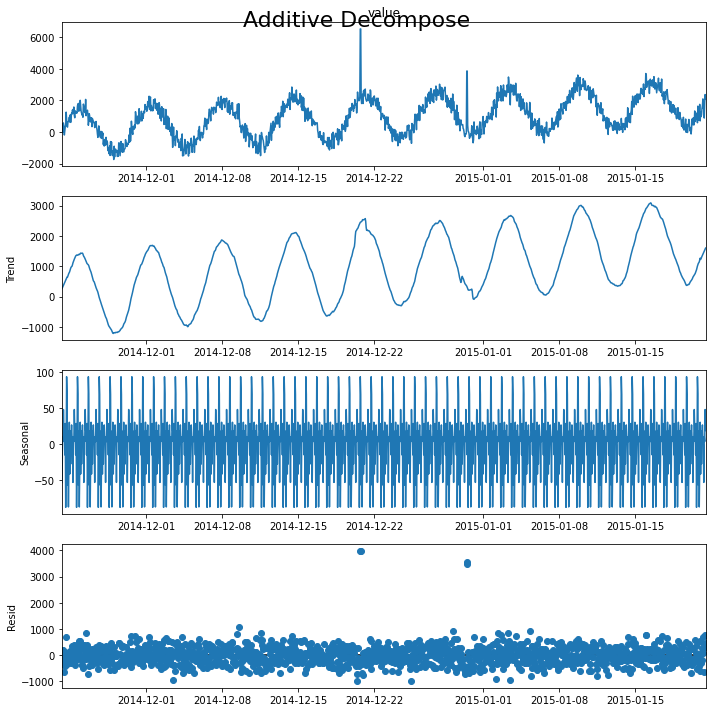



File: A2Benchmarksynthetic_31
threshold: 500
Actual Outliers: 4
                           value  is_anomaly
timestamp                                   
2014-12-20 17:00:00  6519.797396           1
2014-12-20 18:00:00  6519.797396           1
2014-12-30 12:00:00  3853.824702           1
2014-12-30 13:00:00  3853.824702           1
Detected outliers: 79
Outliers:
timestamp
2014-11-23 16:00:00    695.402954
2014-11-24 21:00:00    533.763801
2014-11-24 23:00:00    555.346939
2014-11-25 11:00:00    842.200788
2014-11-29 16:00:00    715.377927
                          ...    
2015-01-20 11:00:00    573.491698
2015-01-20 18:00:00    510.507829
2015-01-20 22:00:00    556.102376
2015-01-21 05:00:00    686.533489
2015-01-21 10:00:00    752.530505
Name: resid, Length: 79, dtype: float64



A2Benchmark_A2Benchmarksynthetic_32add_STL


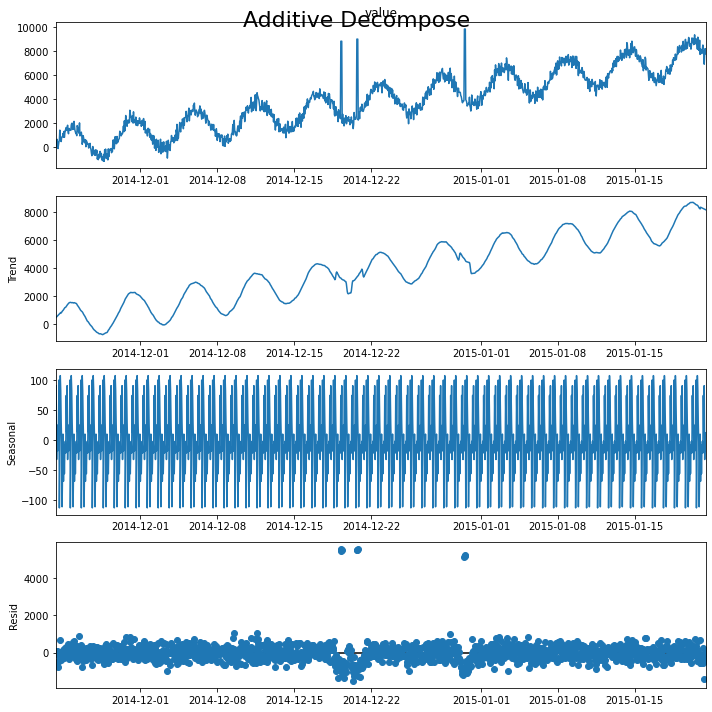



File: A2Benchmarksynthetic_32
threshold: 500
Actual Outliers: 9
                           value  is_anomaly
timestamp                                   
2014-12-19 06:00:00  8812.542813           1
2014-12-19 07:00:00  8812.542813           1
2014-12-19 08:00:00  8812.542813           1
2014-12-20 17:00:00  8987.656808           1
2014-12-20 18:00:00  8987.656808           1
2014-12-20 19:00:00  8987.656808           1
2014-12-30 12:00:00  9830.944052           1
2014-12-30 13:00:00  9830.944052           1
2014-12-30 14:00:00  9830.944052           1
Detected outliers: 99
Outliers:
timestamp
2014-11-23 16:00:00    695.167035
2014-11-24 21:00:00    588.645884
2014-11-24 23:00:00    609.253891
2014-11-25 11:00:00    907.384691
2014-11-29 13:00:00    555.566537
                          ...    
2015-01-19 15:00:00    641.445497
2015-01-19 22:00:00    576.881565
2015-01-20 11:00:00    739.261297
2015-01-20 18:00:00    601.695207
2015-01-20 22:00:00    663.562695
Name: resid, Length: 99

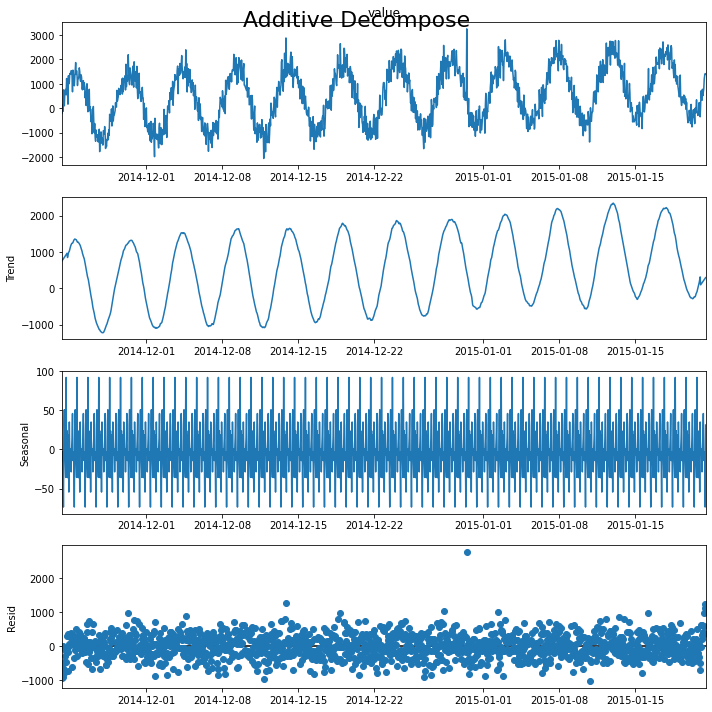



File: A2Benchmarksynthetic_33
threshold: 500
Actual Outliers: 1
                           value  is_anomaly
timestamp                                   
2014-12-30 12:00:00  3252.390692           1
Detected outliers: 99
Outliers:
timestamp
2014-11-24 13:00:00     510.567146
2014-11-25 14:00:00     641.994514
2014-11-25 19:00:00     732.470055
2014-11-26 04:00:00     655.356685
2014-11-27 20:00:00     521.464316
                          ...     
2015-01-21 07:00:00     592.278918
2015-01-21 08:00:00     973.001399
2015-01-21 09:00:00    1102.453058
2015-01-21 10:00:00    1220.958898
2015-01-21 11:00:00    1072.931758
Name: resid, Length: 99, dtype: float64



A2Benchmark_A2Benchmarksynthetic_34add_STL


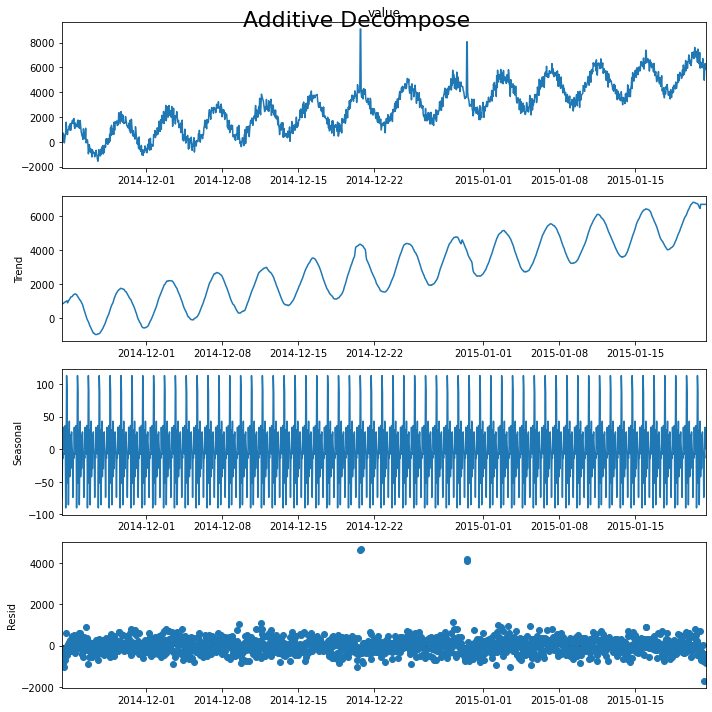



File: A2Benchmarksynthetic_34
threshold: 500
Actual Outliers: 4
                           value  is_anomaly
timestamp                                   
2014-12-20 17:00:00  9088.466267           1
2014-12-20 18:00:00  9088.466267           1
2014-12-30 12:00:00  8056.499950           1
2014-12-30 13:00:00  8056.499950           1
Detected outliers: 101
Outliers:
timestamp
2014-11-23 16:00:00    600.844712
2014-11-24 09:00:00    502.852877
2014-11-24 21:00:00    607.584511
2014-11-24 23:00:00    621.544601
2014-11-25 11:00:00    896.814294
                          ...    
2015-01-19 22:00:00    598.830476
2015-01-20 11:00:00    812.363889
2015-01-20 14:00:00    518.405623
2015-01-20 18:00:00    684.028728
2015-01-20 22:00:00    711.047690
Name: resid, Length: 101, dtype: float64



A2Benchmark_A2Benchmarksynthetic_35add_STL


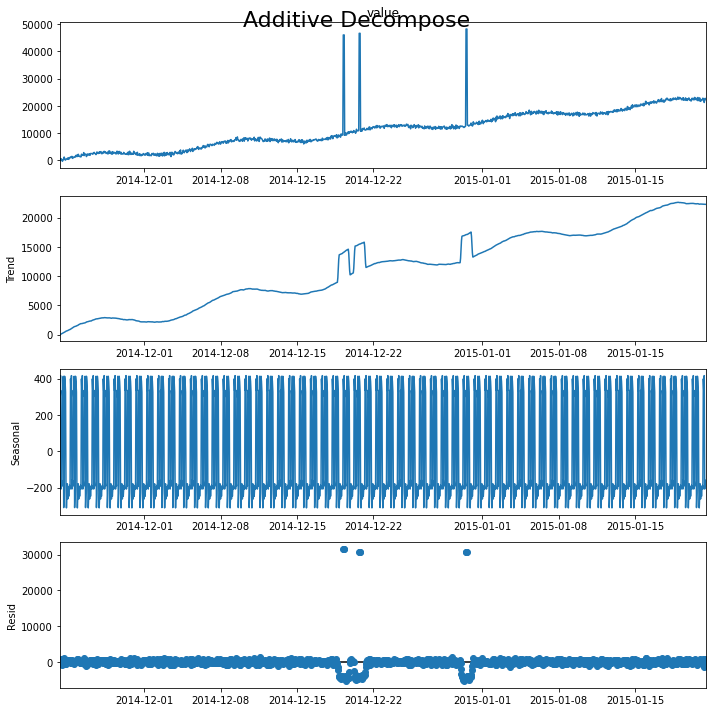



File: A2Benchmarksynthetic_35
threshold: 500
Actual Outliers: 9
                            value  is_anomaly
timestamp                                    
2014-12-19 06:00:00  45998.101187           1
2014-12-19 07:00:00  45998.101187           1
2014-12-19 08:00:00  45998.101187           1
2014-12-20 17:00:00  46597.041510           1
2014-12-20 18:00:00  46597.041510           1
2014-12-20 19:00:00  46597.041510           1
2014-12-30 12:00:00  48173.999054           1
2014-12-30 13:00:00  48173.999054           1
2014-12-30 14:00:00  48173.999054           1
Detected outliers: 192
Outliers:
timestamp
2014-11-23 09:00:00     687.644734
2014-11-23 10:00:00     619.654956
2014-11-23 16:00:00    1096.396638
2014-11-24 09:00:00     596.737716
2014-11-24 21:00:00     765.360436
                          ...     
2015-01-20 05:00:00     554.266562
2015-01-20 11:00:00     915.780859
2015-01-20 22:00:00     873.908082
2015-01-21 05:00:00     740.440334
2015-01-21 10:00:00     646.952454


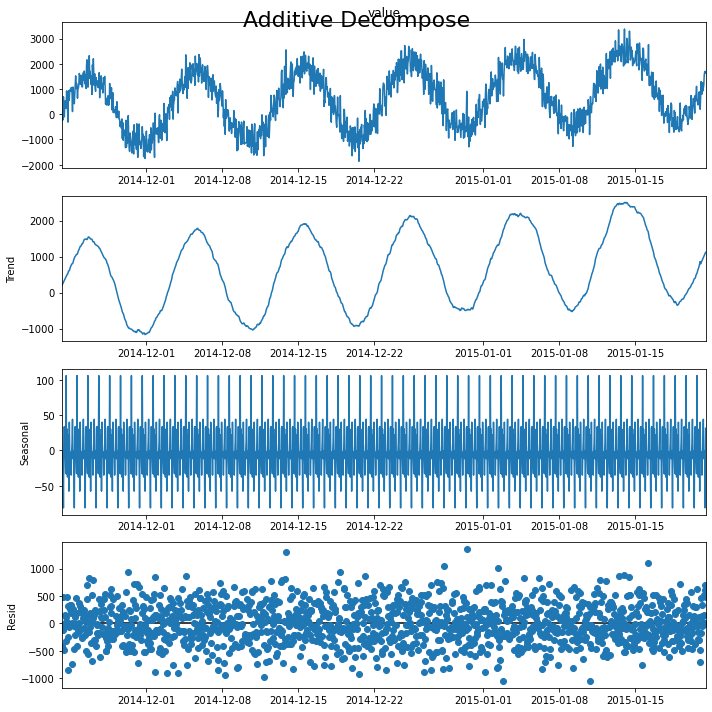



File: A2Benchmarksynthetic_36
threshold: 500
Actual Outliers: 1
                          value  is_anomaly
timestamp                                  
2014-12-30 12:00:00  908.522117           1
Detected outliers: 126
Outliers:
timestamp
2014-11-25 14:00:00    694.471686
2014-11-25 19:00:00    825.287534
2014-11-26 02:00:00    519.359067
2014-11-26 04:00:00    792.607138
2014-11-27 05:00:00    536.338228
                          ...    
2015-01-20 03:00:00    581.048749
2015-01-20 15:00:00    623.888986
2015-01-21 08:00:00    524.123126
2015-01-21 09:00:00    614.251371
2015-01-21 10:00:00    692.037916
Name: resid, Length: 126, dtype: float64
STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:20.624131
[0.7272727272727273, 1.0, 0.04545454545454545, 0.8181818181818181, 0.25, 0.6666666666666666, 0.782608695652174, 0.6666666666666666, 0.5714285714285714, 0.6923076923076924, 0.2857142857142857, 0.2857142857142857, 0.782608695652174, 0.545454545454

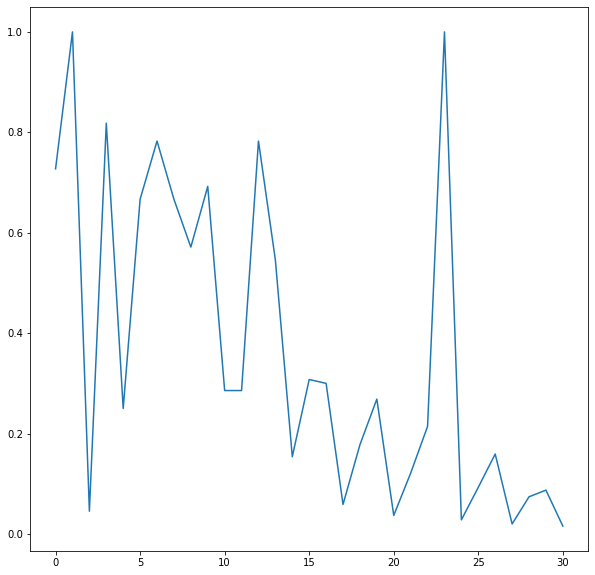

In [ ]:
start_time = datetime.now() 
f1_plot = []
for index,file in enumerate(all_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 30:
        break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    #plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A2Benchmark_" + fname +"add_STL")
    print("\n\n\nA2Benchmark_" + fname +"add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    
    outliers = residualdf[residualdf > threshold]
    anomalies = df_indexed.join(outliers,on='timestamp',how='inner')
    not_anomalies = df_indexed.join(not_outliers,on='timestamp',how='inner')
    not_outliers = residualdf[residualdf < threshold]
    
    p = df_indexed.loc[df_indexed['is_anomaly'] == 1]
    
    n = df_indexed.loc[df_indexed['is_anomaly'] == 0]
    
    truepositives = anomalies.loc[anomalies['is_anomaly'] == 1]
    
    falsepositives = anomalies.loc[anomalies['is_anomaly'] == 0]
    
    truenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 0]
    
    falsenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 1]
    
    #Traditional FPR and TPR formmulae
    #tpr = truepositives.count()/(truepositives.count() + falsenegatives.count())
    #fpr = falsepositives.count()/(falsepositives.count() + truenegatives.count())
    
    #IDEAL Paper based TRP/FPR rates
    fpr = len(falsepositives)/len(n)
    tpr = len(truepositives)/len(p)
    fnr = 1-tpr
    tnr = 1-fpr
    
    precision = len(truepositives)/(len(truepositives) + len(falsepositives))
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    
    f1 = 2 * (precision * recall)/(precision + recall)
    f1_plot.append(f1)
    
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        file.write("\n\n\n Statistics:")
        file.write(f"\ntrue positives:{len(truepositives)}")
        file.write(f"\nfalse positives:{len(falsepositives)}")
        file.write(f"\ntrue negatives:{len(truenegatives)}")
        file.write(f"\nfalse negatives:{len(falsenegatives)}")
        file.write(f"\nFPR:{fpr}")
        file.write(f"\nTPR:{tpr}")
        file.write(f"\nFNR:{fnr}")
        file.write(f"\nTNR:{tnr}")
        
        file.write(f"\nPrecision:{precision}")
        file.write(f"\nREcall:{recall}")
        file.write(f"\nF1:{f1}")
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Actual Outliers:", len(p))
    print(p)
    print("Detected outliers:", len(outliers))
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
print(f1_plot)
plt.plot(f1_plot)

In [ ]:
print(f"STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")

STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:20.624131


In [ ]:
print(sum(f1_plot)/len(f1_plot))

0.36248695501582145


In [ ]:
f1_plot

[0.7272727272727273,
 1.0,
 0.04545454545454545,
 0.8181818181818181,
 0.25,
 0.6666666666666666,
 0.782608695652174,
 0.6666666666666666,
 0.5714285714285714,
 0.6923076923076924,
 0.2857142857142857,
 0.2857142857142857,
 0.782608695652174,
 0.5454545454545454,
 0.15384615384615385,
 0.3076923076923077,
 0.30000000000000004,
 0.05882352941176471,
 0.17777777777777778,
 0.26865671641791045,
 0.037037037037037035,
 0.12121212121212119,
 0.21428571428571425,
 1.0,
 0.028169014084507043,
 0.09302325581395349,
 0.1592920353982301,
 0.02,
 0.07407407407407407,
 0.08737864077669903,
 0.015748031496062992]

### Standardizing the Time series and applying

In [34]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [35]:
df_indexed

value  is_anomaly
timestamp                                  
2014-11-23 07:00:00  127.699238           0
2014-11-23 08:00:00   23.069614           0
2014-11-23 09:00:00  246.118857           0
2014-11-23 10:00:00  295.937818           0
2014-11-23 11:00:00  264.649986           0
...                         ...         ...
2015-01-21 07:00:00   21.595423           0
2015-01-21 08:00:00 -246.681048           0
2015-01-21 09:00:00  102.938096           0
2015-01-21 10:00:00  310.727447           0
2015-01-21 11:00:00  251.369372           0

[1421 rows x 2 columns]

Processing index: 0 of 100
Mean: 100.510082, StandardDeviation: 994.197252


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


               timestamp       value  is_anomaly
0    2014-11-23 07:00:00  127.699238           0
1    2014-11-23 08:00:00   23.069614           0
2    2014-11-23 09:00:00  246.118857           0
3    2014-11-23 10:00:00  295.937818           0
4    2014-11-23 11:00:00  264.649986           0
...                  ...         ...         ...
1416 2015-01-21 07:00:00   21.595423           0
1417 2015-01-21 08:00:00 -246.681048           0
1418 2015-01-21 09:00:00  102.938096           0
1419 2015-01-21 10:00:00  310.727447           0
1420 2015-01-21 11:00:00  251.369372           0

[1421 rows x 3 columns]


FileNotFoundError: ignored

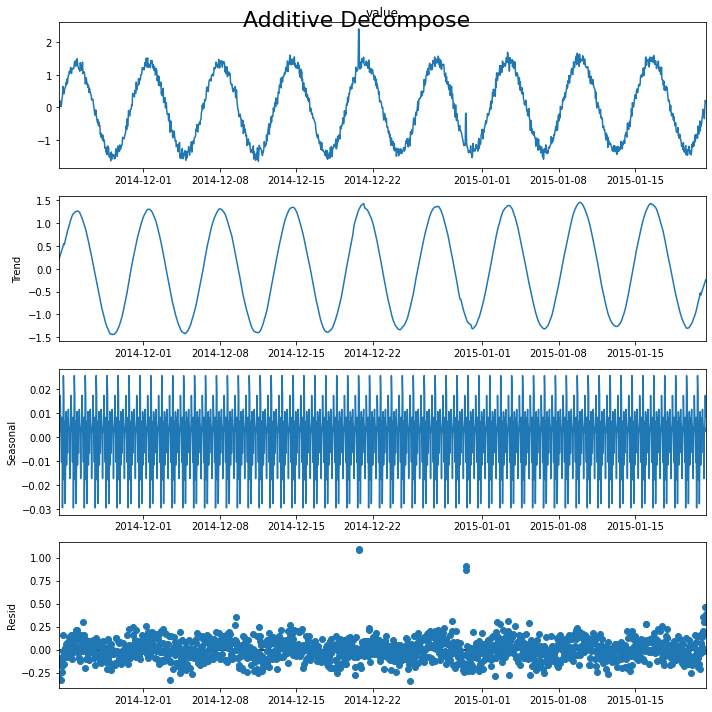

In [36]:
start_time = datetime.now() 
f1_plot = []
for index,file in enumerate(all_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
#     if index > 30:
#         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    
    # prepare data for standardization
    values = df_indexed.copy()
    values = values.drop(columns=['is_anomaly'],axis=1)
    #values = values.reshape((len(values), 1))
    
    # train the standardization
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values)
    print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
    # standardize the dataset
    standardaized = scaler2.transform(values)
    
    #jugaad, change so that standardized is used from here on.
    for i in range(len(df)):
        df_indexed['value'].iloc[i] = standardaized[i]
        
    print(df)
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    #plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A2Benchmark_" + fname +"add_STL")
    print("\n\n\nA2Benchmark_" + fname +"add_STL")
    plt.show()
    threshold=0.5
    residualdf = result_add.resid
    residualdf = residualdf.reset_index()
    
    outliers = residualdf[residualdf.resid > threshold]
    not_outliers = residualdf.reset_index().merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
    anomalies = df_indexed.join(outliers.set_index('timestamp'),on='timestamp',how='inner')
    not_anomalies = df_indexed.join(not_outliers.set_index('timestamp'),on='timestamp',how='inner')
    #not_outliers = residualdf[residualdf < threshold]
    
    p = df_indexed.loc[df_indexed['is_anomaly'] == 1]
    
    n = df_indexed.loc[df_indexed['is_anomaly'] == 0]
    
    truepositives = anomalies.loc[anomalies['is_anomaly'] == 1]
    
    falsepositives = anomalies.loc[anomalies['is_anomaly'] == 0]
    
    truenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 0]
    
    falsenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 1]
    
    #Traditional FPR and TPR formmulae
    #tpr = truepositives.count()/(truepositives.count() + falsenegatives.count())
    #fpr = falsepositives.count()/(falsepositives.count() + truenegatives.count())
    
    #IDEAL Paper based TRP/FPR rates
    fpr = len(falsepositives)/len(n)
    tpr = len(truepositives)/len(p)
    fnr = 1-tpr
    tnr = 1-fpr
    
    precision = len(truepositives)/(len(truepositives) + len(falsepositives))
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    
    f1 = 2 * (precision * recall)/(precision + recall)
    f1_plot.append(f1)
    
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        file.write("\n\n\n Statistics:")
        file.write(f"\ntrue positives:{len(truepositives)}")
        file.write(f"\nfalse positives:{len(falsepositives)}")
        file.write(f"\ntrue negatives:{len(truenegatives)}")
        file.write(f"\nfalse negatives:{len(falsenegatives)}")
        file.write(f"\nFPR:{fpr}")
        file.write(f"\nTPR:{tpr}")
        file.write(f"\nFNR:{fnr}")
        file.write(f"\nTNR:{tnr}")
        
        file.write(f"\nPrecision:{precision}")
        file.write(f"\nREcall:{recall}")
        file.write(f"\nF1:{f1}")
        
        
    print(f"\n\nFile: {fname}")
    print(f"threshold:{threshold}")
    print("Actual Outliers:", len(p))
    print(p)
    print("Detected outliers:", len(outliers))
    print("Outliers:")
    print(outliers)
    print("--------------------")
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
print(f1_plot)
plt.plot(f1_plot)

In [ ]:
print(sum(f1_plot)/len(f1_plot))

0.7615574683059201


### Changing Manual threshold to k std devs

Now that we have the standardized values of the TS applied, we change the value of the threshold from a static to a dynamically set value. First we try the k standard deviations method of deciding the threshold.

Processing index: 0 of 100
Mean: 6.368346, StandardDeviation: 987.420584
               timestamp       value  is_anomaly
0    2014-11-23 07:00:00   13.894031           0
1    2014-11-23 08:00:00   33.578274           0
2    2014-11-23 09:00:00   88.933746           0
3    2014-11-23 10:00:00  125.389424           0
4    2014-11-23 11:00:00  152.962000           0
...                  ...         ...         ...
1416 2015-01-21 07:00:00 -141.419766           0
1417 2015-01-21 08:00:00 -139.657834           0
1418 2015-01-21 09:00:00  -70.550652           0
1419 2015-01-21 10:00:00  -16.857148           0
1420 2015-01-21 11:00:00    7.757660           0

[1421 rows x 3 columns]


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_1add_STL


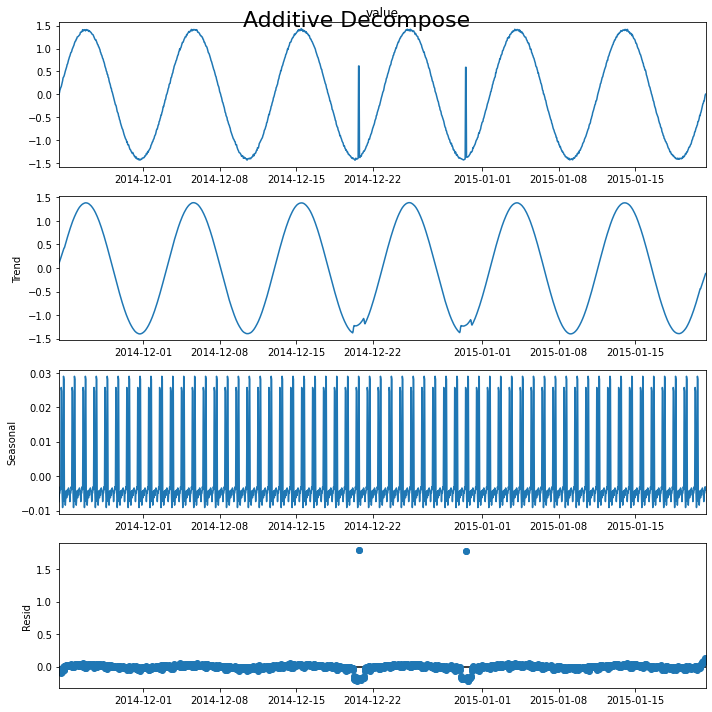



File: A2Benchmarksynthetic_1
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  0.617816           1
2014-12-20 18:00:00  0.617816           1
2014-12-30 12:00:00  0.588934           1
2014-12-30 13:00:00  0.588934           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    1.794800
2014-12-20 18:00:00    1.788847
2014-12-30 12:00:00    1.782777
2014-12-30 13:00:00    1.778251
Name: resid, dtype: float64
----------------
Mean: 100.510082, StandardDeviation: 994.197252
               timestamp       value  is_anomaly
0    2014-11-23 07:00:00  127.699238           0
1    2014-11-23 08:00:00   23.069614           0
2    2014-11-23 09:00:00  246.118857           0
3    2014-11-23 10:00:00  295.937818           0
4    2014-11-23 11:00:00  264.649986           0
...                  ...         ...         ...
1416 2015-01-21 07:00:00   21.595423           0
1417 2015-01-21 08:00:00 -246

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_10add_STL


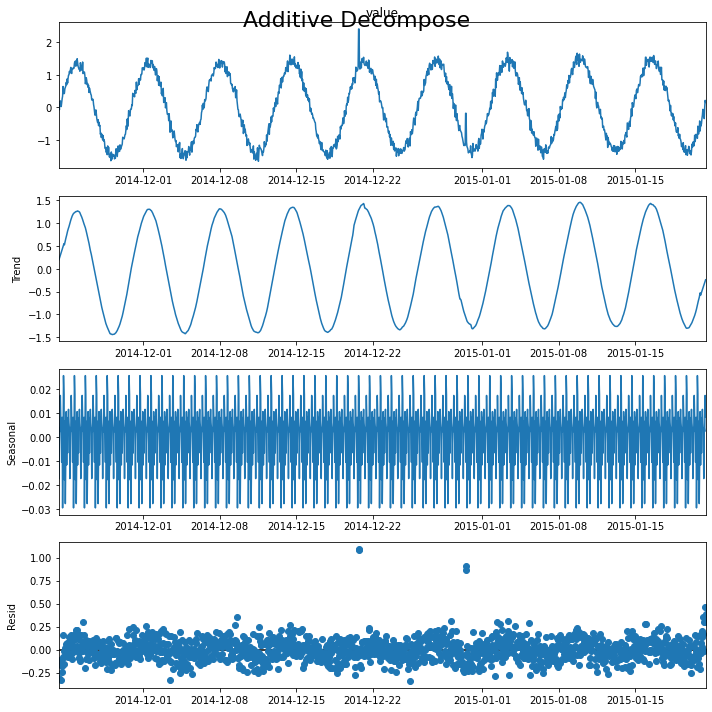



File: A2Benchmarksynthetic_10
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  2.403750           1
2014-12-20 18:00:00  2.403750           1
2014-12-30 12:00:00 -0.185198           1
2014-12-30 13:00:00 -0.185198           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    1.095023
2014-12-20 18:00:00    1.083752
2014-12-30 12:00:00    0.866077
2014-12-30 13:00:00    0.905521
Name: resid, dtype: float64
----------------
Mean: 17255.105564, StandardDeviation: 10042.787001
               timestamp         value  is_anomaly
0    2014-11-23 07:00:00    530.537582           0
1    2014-11-23 08:00:00    -36.182104           0
2    2014-11-23 09:00:00    698.380385           0
3    2014-11-23 10:00:00    745.766197           0
4    2014-11-23 11:00:00    472.031180           0
...                  ...           ...         ...
1416 2015-01-21 07:00:00  34499.926302           0
1417 201

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_100add_STL


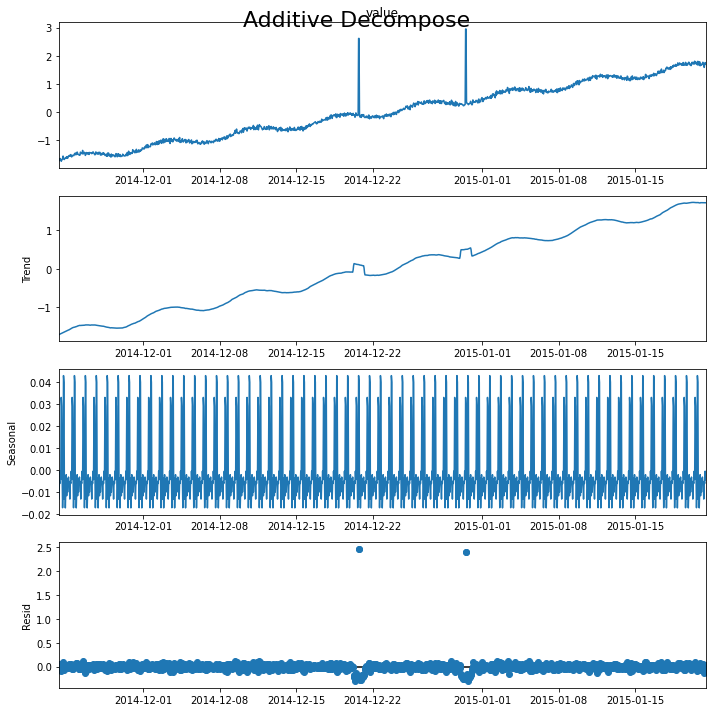



File: A2Benchmarksynthetic_100
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  2.615356           1
2014-12-20 18:00:00  2.615356           1
2014-12-30 12:00:00  2.950290           1
2014-12-30 13:00:00  2.950290           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    2.459075
2014-12-20 18:00:00    2.466446
2014-12-30 12:00:00    2.407609
2014-12-30 13:00:00    2.410951
Name: resid, dtype: float64
----------------
Mean: 1613.761107, StandardDeviation: 1381.918933
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   142.349854           0
1    2014-11-23 08:00:00    33.132799           0
2    2014-11-23 09:00:00   283.994868           0
3    2014-11-23 10:00:00   344.388904           0
4    2014-11-23 11:00:00   315.516784           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00  3370.568406           0
1417 2015-01-21 0

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_11add_STL


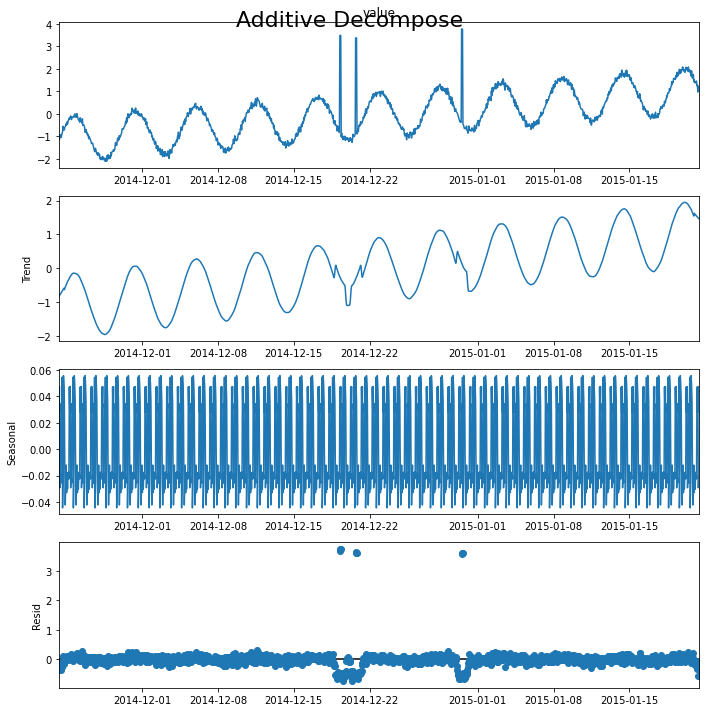



File: A2Benchmarksynthetic_11
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  3.480926           1
2014-12-19 07:00:00  3.480926           1
2014-12-19 08:00:00  3.480926           1
2014-12-20 17:00:00  3.372082           1
2014-12-20 18:00:00  3.372082           1
2014-12-20 19:00:00  3.372082           1
2014-12-30 12:00:00  3.767044           1
2014-12-30 13:00:00  3.767044           1
2014-12-30 14:00:00  3.767044           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    3.688824
2014-12-19 07:00:00    3.741715
2014-12-19 08:00:00    3.751663
2014-12-20 17:00:00    3.638748
2014-12-20 18:00:00    3.617800
2014-12-20 19:00:00    3.600371
2014-12-30 12:00:00    3.575888
2014-12-30 13:00:00    3.618063
2014-12-30 14:00:00    3.627575
Name: resid, dtype: float64
----------------
Mean: 70.366661, StandardDeviation: 994.123425
               timestamp       value  is_anomaly
0 

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_12add_STL


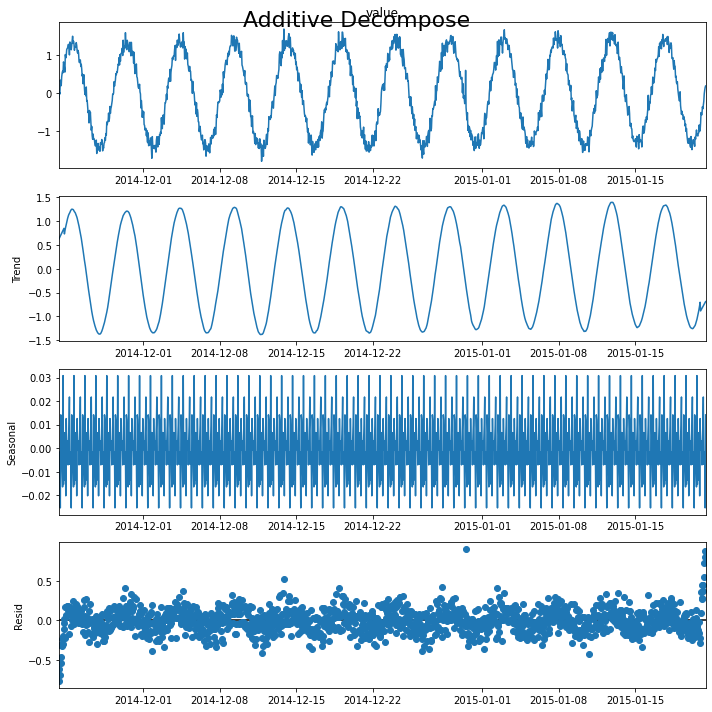



File: A2Benchmarksynthetic_12
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  0.604069           1
Detected outliers: 7
Outliers:
timestamp
2014-12-13 21:00:00    0.521293
2014-12-30 12:00:00    0.904908
2015-01-21 07:00:00    0.549320
2015-01-21 08:00:00    0.723506
2015-01-21 09:00:00    0.805690
2015-01-21 10:00:00    0.884116
2015-01-21 11:00:00    0.864671
Name: resid, dtype: float64
----------------
Mean: 1399.681750, StandardDeviation: 1305.117440
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   167.353006           0
1    2014-11-23 08:00:00    44.654007           0
2    2014-11-23 09:00:00   346.780724           0
3    2014-11-23 10:00:00   423.856495           0
4    2014-11-23 11:00:00   395.187353           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00  3089.294936           0
1417 2015-01-21 08:00:00  2589.654340           

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_13add_STL


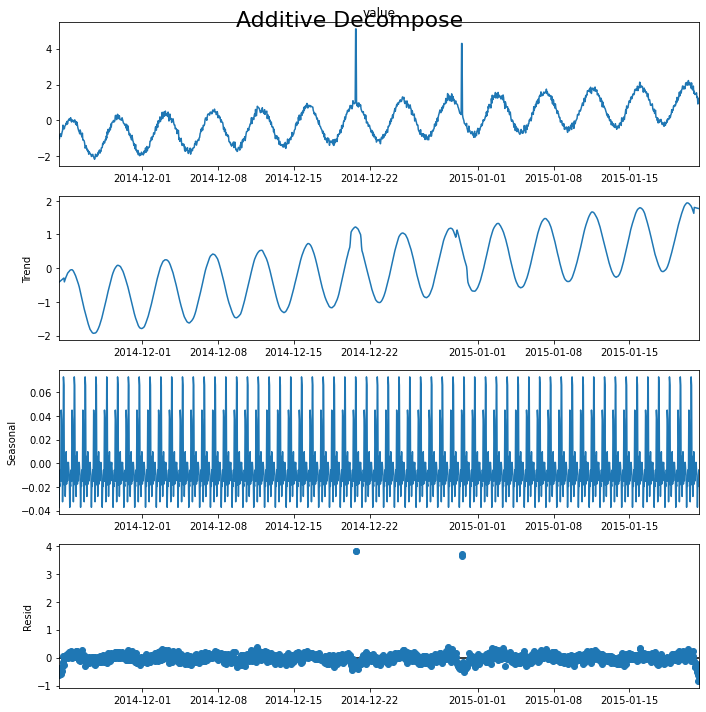



File: A2Benchmarksynthetic_13
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  5.100373           1
2014-12-20 18:00:00  5.100373           1
2014-12-30 12:00:00  4.287849           1
2014-12-30 13:00:00  4.287849           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    3.805289
2014-12-20 18:00:00    3.820420
2014-12-30 12:00:00    3.626537
2014-12-30 13:00:00    3.694080
Name: resid, dtype: float64
----------------
Mean: 4873.417218, StandardDeviation: 2960.351286
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   184.728233           0
1    2014-11-23 08:00:00    -4.821284           0
2    2014-11-23 09:00:00   263.194207           0
3    2014-11-23 10:00:00   289.597838           0
4    2014-11-23 11:00:00   203.109403           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00  9598.339840           0
1417 2015-01-21 08

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_14add_STL


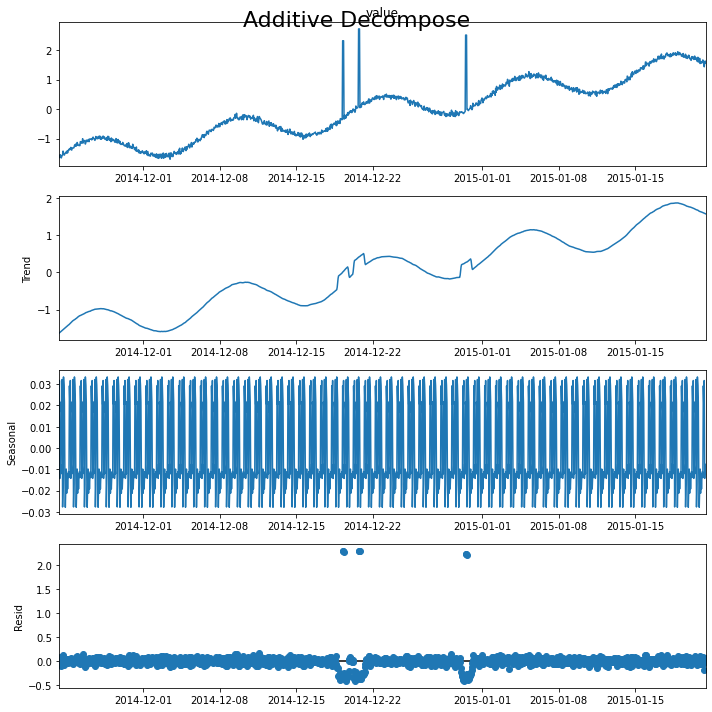



File: A2Benchmarksynthetic_14
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  2.320077           1
2014-12-19 07:00:00  2.320077           1
2014-12-19 08:00:00  2.320077           1
2014-12-20 17:00:00  2.722561           1
2014-12-20 18:00:00  2.722561           1
2014-12-20 19:00:00  2.722561           1
2014-12-30 12:00:00  2.513307           1
2014-12-30 13:00:00  2.513307           1
2014-12-30 14:00:00  2.513307           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    2.286676
2014-12-19 07:00:00    2.284346
2014-12-19 08:00:00    2.260638
2014-12-20 17:00:00    2.283556
2014-12-20 18:00:00    2.279894
2014-12-20 19:00:00    2.279935
2014-12-30 12:00:00    2.229762
2014-12-30 13:00:00    2.228854
2014-12-30 14:00:00    2.209185
Name: resid, dtype: float64
----------------
Mean: 110.688388, StandardDeviation: 1004.712332
               timestamp       value  is_anomaly


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_15add_STL


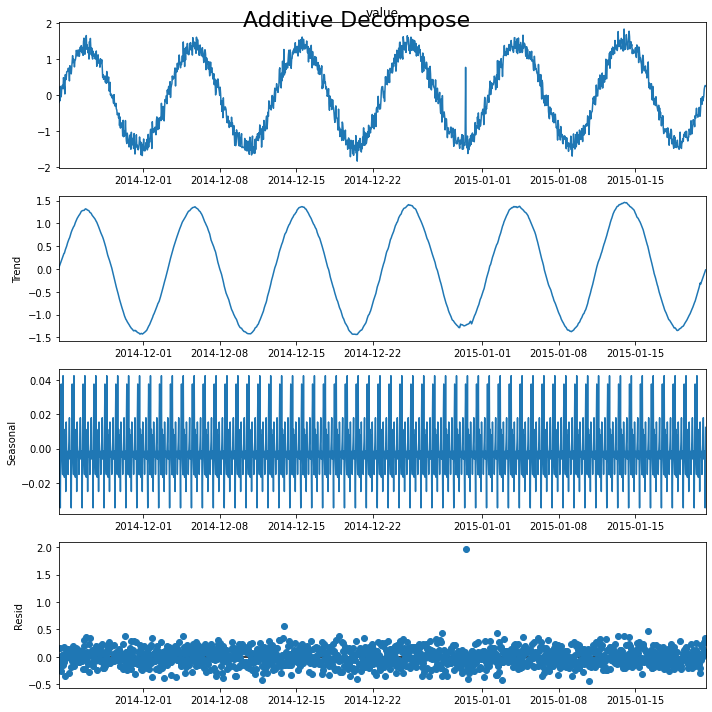



File: A2Benchmarksynthetic_15
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  0.770344           1
Detected outliers: 2
Outliers:
timestamp
2014-12-13 21:00:00    0.553079
2014-12-30 12:00:00    1.964553
Name: resid, dtype: float64
----------------
Mean: 3191.408691, StandardDeviation: 2074.503331
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   207.726035           0
1    2014-11-23 08:00:00     2.708866           0
2    2014-11-23 09:00:00   320.121007           0
3    2014-11-23 10:00:00   361.573087           0
4    2014-11-23 11:00:00   274.004645           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00  6476.736575           0
1417 2015-01-21 08:00:00  5919.104142           0
1418 2015-01-21 09:00:00  6345.859032           0
1419 2015-01-21 10:00:00  6546.145013           0
1420 2015-01-21 11:00:00  6320.390090           0

[1421 r

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_16add_STL


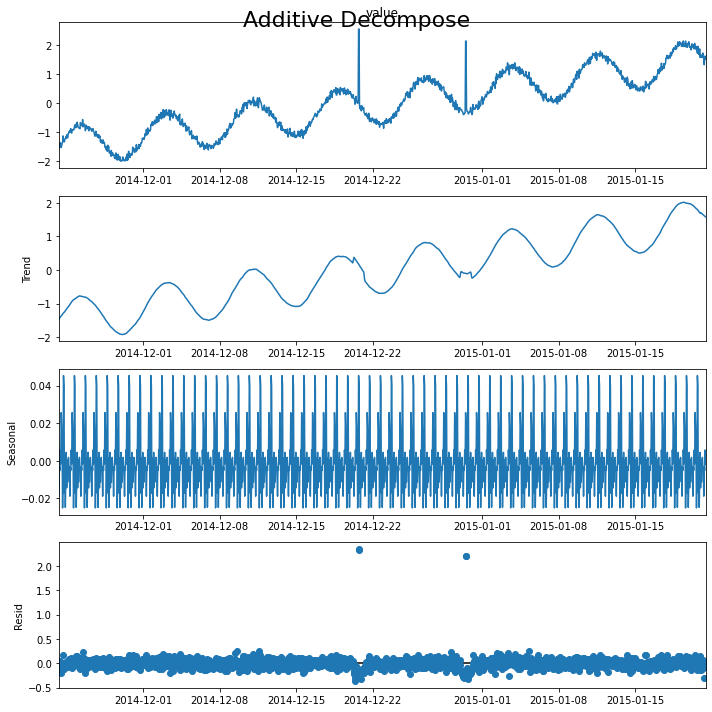



File: A2Benchmarksynthetic_16
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  2.544810           1
2014-12-20 18:00:00  2.544810           1
2014-12-30 12:00:00  2.131365           1
2014-12-30 13:00:00  2.131365           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    2.321884
2014-12-20 18:00:00    2.351360
2014-12-30 12:00:00    2.202763
2014-12-30 13:00:00    2.214161
Name: resid, dtype: float64
----------------
Mean: 299.954448, StandardDeviation: 1024.294474
               timestamp       value  is_anomaly
0    2014-11-23 07:00:00  216.370595           0
1    2014-11-23 08:00:00    0.762393           0
2    2014-11-23 09:00:00  339.998476           0
3    2014-11-23 10:00:00  386.066099           0
4    2014-11-23 11:00:00  294.997672           0
...                  ...         ...         ...
1416 2015-01-21 07:00:00  427.016575           0
1417 2015-01-21 08:00:00  -

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_17add_STL


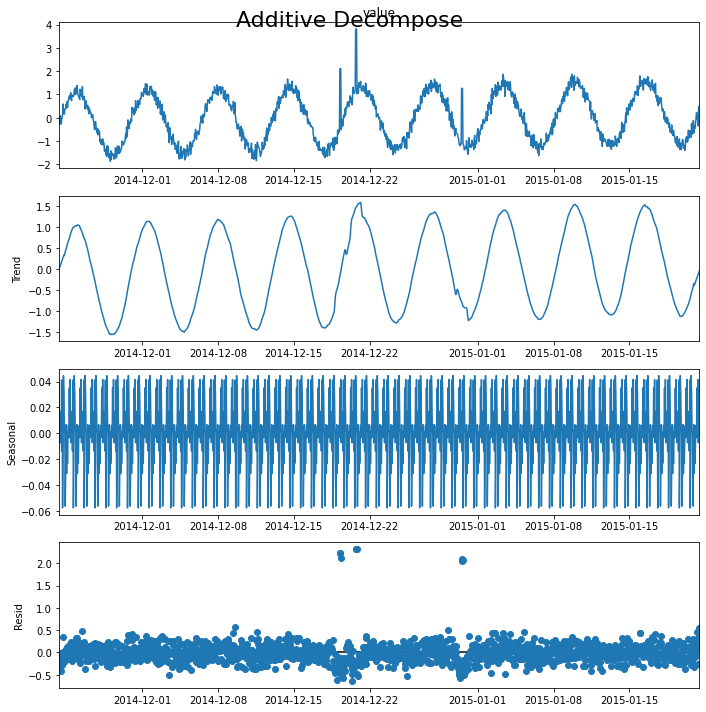



File: A2Benchmarksynthetic_17
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  2.103996           1
2014-12-19 07:00:00  2.103996           1
2014-12-19 08:00:00  2.103996           1
2014-12-20 17:00:00  3.814266           1
2014-12-20 18:00:00  3.814266           1
2014-12-20 19:00:00  3.814266           1
2014-12-30 12:00:00  1.260559           1
2014-12-30 13:00:00  1.260559           1
2014-12-30 14:00:00  1.260559           1
Detected outliers: 12
Outliers:
timestamp
2014-12-09 13:00:00    0.580740
2014-12-19 06:00:00    2.233107
2014-12-19 07:00:00    2.217607
2014-12-19 08:00:00    2.123253
2014-12-20 17:00:00    2.310747
2014-12-20 18:00:00    2.308735
2014-12-20 19:00:00    2.320300
2014-12-29 05:00:00    0.509084
2014-12-30 12:00:00    2.044445
2014-12-30 13:00:00    2.090815
2014-12-30 14:00:00    2.070218
2015-01-21 10:00:00    0.556620
Name: resid, dtype: float64
----------------
P

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_18add_STL


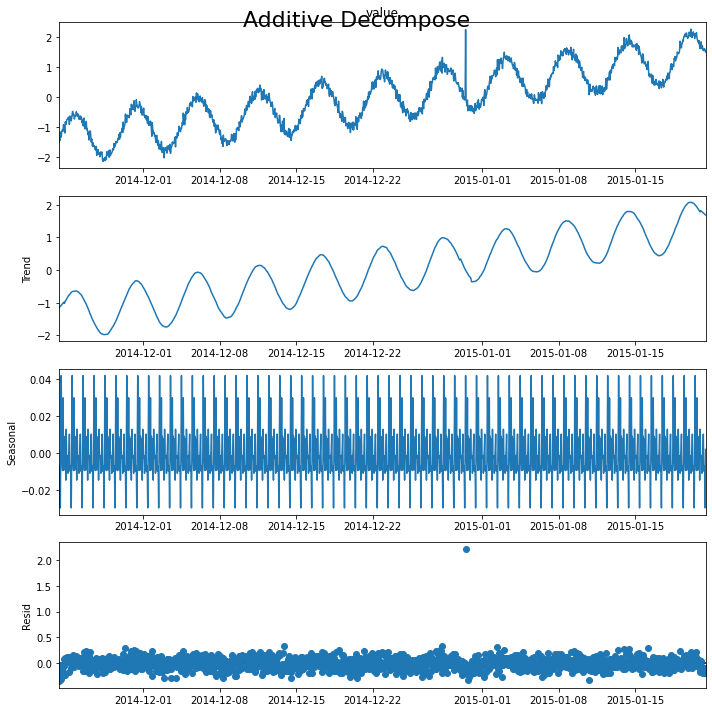



File: A2Benchmarksynthetic_18
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  2.254806           1
Detected outliers: 1
Outliers:
timestamp
2014-12-30 12:00:00    2.214789
Name: resid, dtype: float64
----------------
Mean: 362.532163, StandardDeviation: 1021.057616
               timestamp       value  is_anomaly
0    2014-11-23 07:00:00  241.730372           0
1    2014-11-23 08:00:00   13.002987           0
2    2014-11-23 09:00:00  403.903242           0
3    2014-11-23 10:00:00  467.125337           0
4    2014-11-23 11:00:00  376.841672           0
...                  ...         ...         ...
1416 2015-01-21 07:00:00  505.374338           0
1417 2015-01-21 08:00:00  -33.075959           0
1418 2015-01-21 09:00:00  597.094994           0
1419 2015-01-21 10:00:00  959.137435           0
1420 2015-01-21 11:00:00  816.022583           0

[1421 rows x 3 columns]


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_19add_STL


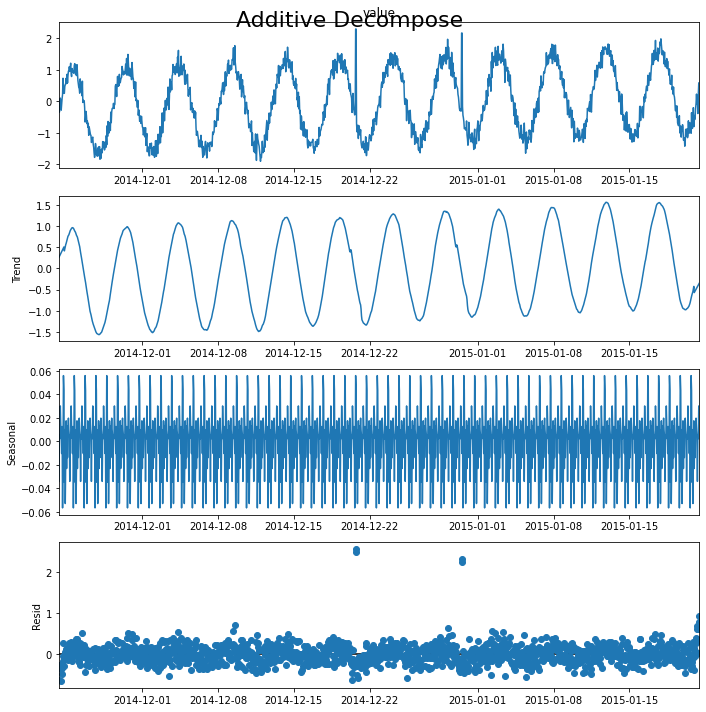



File: A2Benchmarksynthetic_19
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  2.290352           1
2014-12-20 18:00:00  2.290352           1
2014-12-30 12:00:00  2.162908           1
2014-12-30 13:00:00  2.162908           1
Detected outliers: 19
Outliers:
timestamp
2014-11-25 11:00:00    0.510236
2014-11-29 16:00:00    0.528006
2014-11-30 01:00:00    0.505150
2014-12-04 08:00:00    0.530395
2014-12-09 10:00:00    0.558331
2014-12-09 13:00:00    0.723112
2014-12-20 17:00:00    2.490710
2014-12-20 18:00:00    2.576010
2014-12-29 05:00:00    0.633068
2014-12-30 12:00:00    2.255597
2014-12-30 13:00:00    2.340555
2015-01-02 08:00:00    0.557982
2015-01-02 15:00:00    0.519019
2015-01-03 08:00:00    0.549966
2015-01-21 05:00:00    0.690044
2015-01-21 07:00:00    0.604629
2015-01-21 09:00:00    0.618237
2015-01-21 10:00:00    0.925076
2015-01-21 11:00:00    0.781225
Name: resid, dtype: float64
----

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_2add_STL


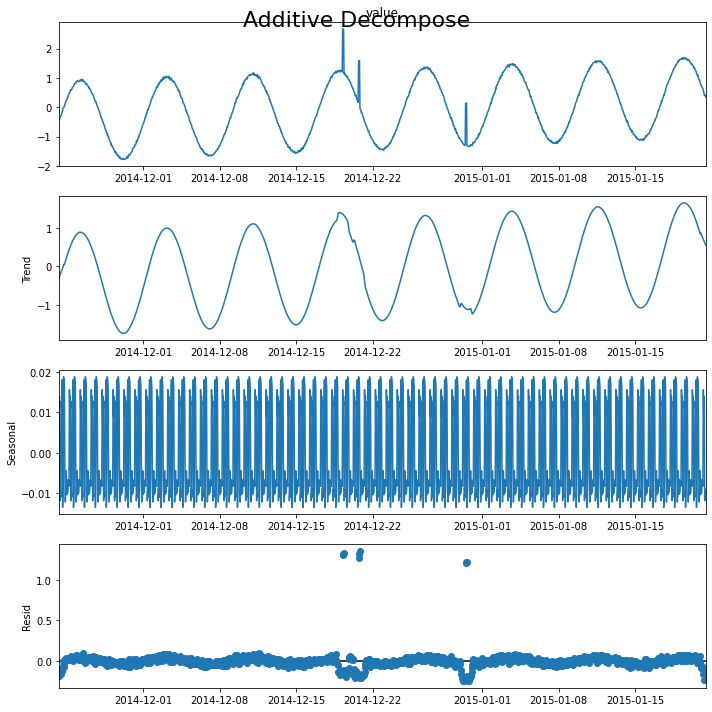



File: A2Benchmarksynthetic_2
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  2.673989           1
2014-12-19 07:00:00  2.673989           1
2014-12-19 08:00:00  2.673989           1
2014-12-20 17:00:00  1.588931           1
2014-12-20 18:00:00  1.588931           1
2014-12-20 19:00:00  1.588931           1
2014-12-30 12:00:00  0.141373           1
2014-12-30 13:00:00  0.141373           1
2014-12-30 14:00:00  0.141373           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    1.304327
2014-12-19 07:00:00    1.322486
2014-12-19 08:00:00    1.329592
2014-12-20 17:00:00    1.270474
2014-12-20 18:00:00    1.315454
2014-12-20 19:00:00    1.361520
2014-12-30 12:00:00    1.215138
2014-12-30 13:00:00    1.225196
2014-12-30 14:00:00    1.225835
Name: resid, dtype: float64
----------------
Mean: 1995.674055, StandardDeviation: 1534.256092
               timestamp        value  is_anomaly

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_20add_STL


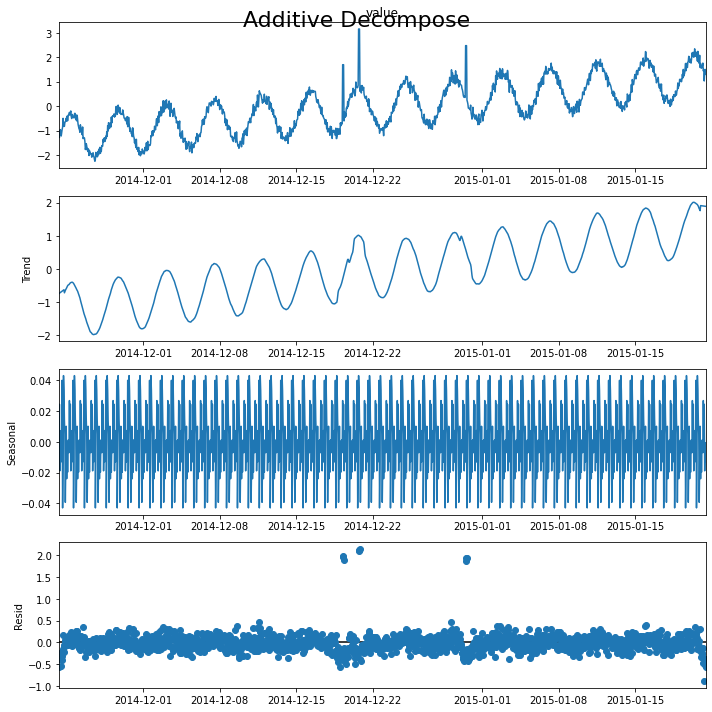



File: A2Benchmarksynthetic_20
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  1.694426           1
2014-12-19 07:00:00  1.694426           1
2014-12-19 08:00:00  1.694426           1
2014-12-20 17:00:00  3.156465           1
2014-12-20 18:00:00  3.156465           1
2014-12-20 19:00:00  3.156465           1
2014-12-30 12:00:00  2.475857           1
2014-12-30 13:00:00  2.475857           1
2014-12-30 14:00:00  2.475857           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    1.976275
2014-12-19 07:00:00    1.963655
2014-12-19 08:00:00    1.882537
2014-12-20 17:00:00    2.099450
2014-12-20 18:00:00    2.117918
2014-12-20 19:00:00    2.147444
2014-12-30 12:00:00    1.876114
2014-12-30 13:00:00    1.938604
2014-12-30 14:00:00    1.949961
Name: resid, dtype: float64
----------------
Mean: 7282.327986, StandardDeviation: 4298.843109
               timestamp         value  is_anoma

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_21add_STL


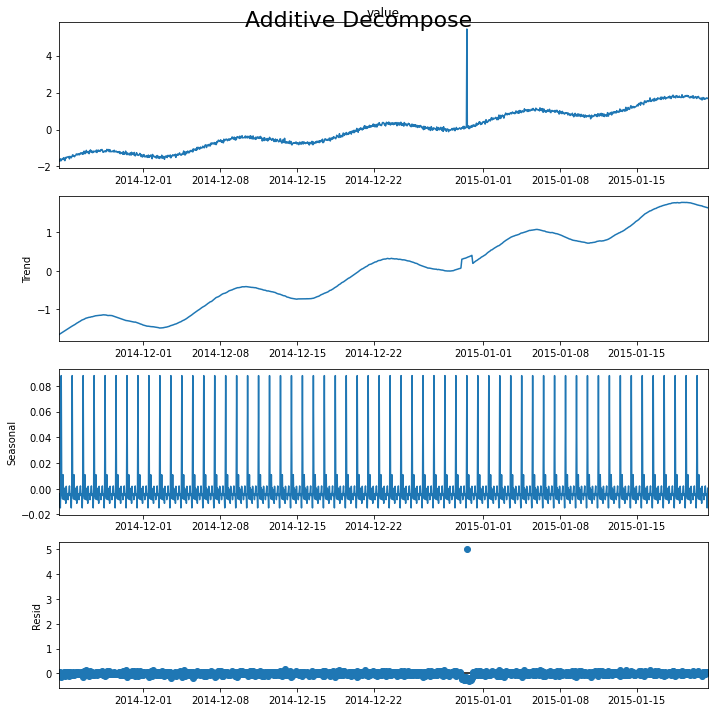



File: A2Benchmarksynthetic_21
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  5.445587           1
Detected outliers: 1
Outliers:
timestamp
2014-12-30 12:00:00    5.013185
Name: resid, dtype: float64
----------------
Mean: 480.352675, StandardDeviation: 1013.895439
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   279.790955           0
1    2014-11-23 08:00:00   -33.577684           0
2    2014-11-23 09:00:00   370.221164           0
3    2014-11-23 10:00:00   395.305678           0
4    2014-11-23 11:00:00   243.419322           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00   908.846316           0
1417 2015-01-21 08:00:00   238.400663           0
1418 2015-01-21 09:00:00   919.483595           0
1419 2015-01-21 10:00:00  1289.891987           0
1420 2015-01-21 11:00:00  1075.582876           0

[1421 rows x 3 columns]


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_22add_STL


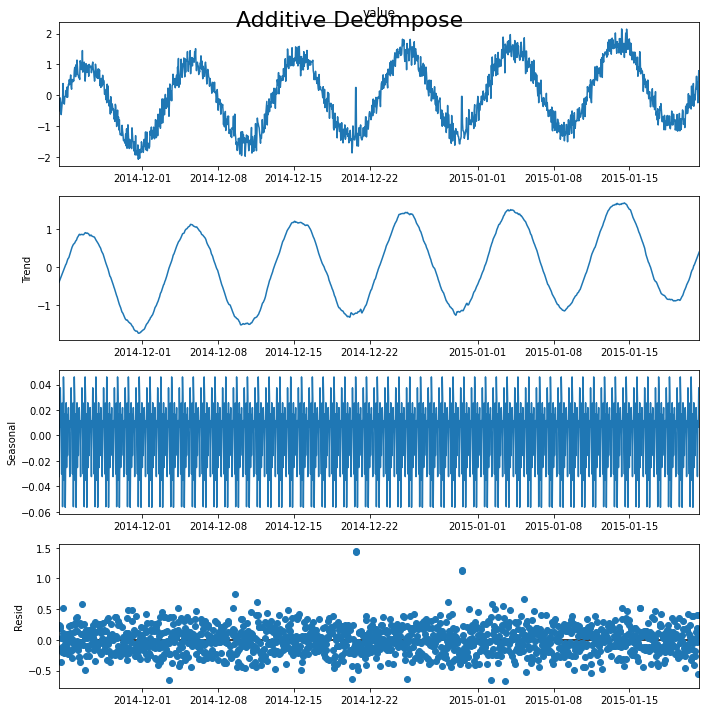



File: A2Benchmarksynthetic_22
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  0.253864           1
2014-12-20 18:00:00  0.253864           1
2014-12-30 12:00:00 -0.033395           1
2014-12-30 13:00:00 -0.033395           1
Detected outliers: 19
Outliers:
timestamp
2014-11-23 16:00:00    0.520624
2014-11-25 11:00:00    0.577330
2014-12-04 08:00:00    0.522155
2014-12-09 10:00:00    0.525323
2014-12-09 13:00:00    0.740203
2014-12-11 15:00:00    0.617825
2014-12-20 17:00:00    1.426831
2014-12-20 18:00:00    1.448206
2014-12-29 05:00:00    0.617578
2014-12-30 12:00:00    1.125472
2014-12-30 13:00:00    1.145680
2014-12-31 04:00:00    0.503498
2015-01-02 08:00:00    0.579775
2015-01-02 15:00:00    0.510930
2015-01-03 08:00:00    0.559901
2015-01-05 07:00:00    0.663284
2015-01-14 07:00:00    0.516264
2015-01-15 23:00:00    0.517094
2015-01-16 00:00:00    0.514944
Name: resid, dtype: float64
----

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_23add_STL


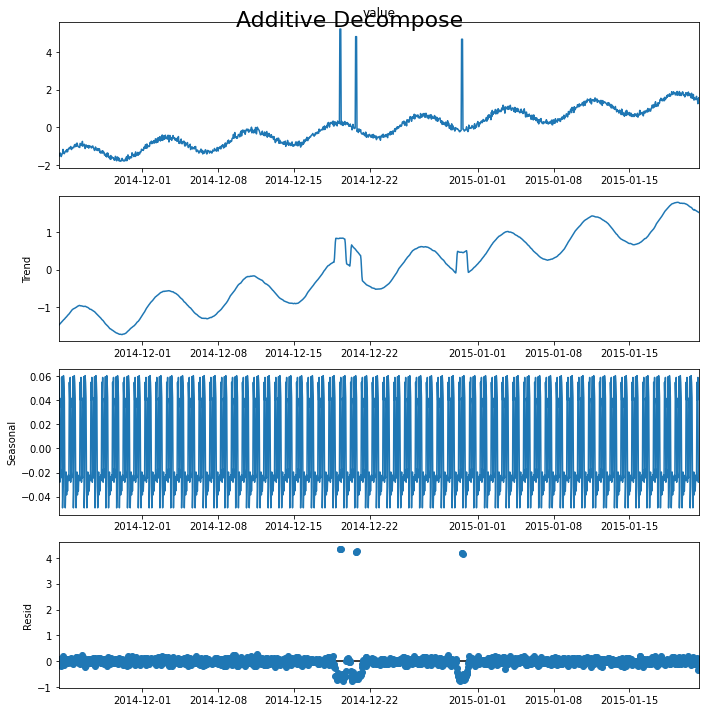



File: A2Benchmarksynthetic_23
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  5.219308           1
2014-12-19 07:00:00  5.219308           1
2014-12-19 08:00:00  5.219308           1
2014-12-20 17:00:00  4.813770           1
2014-12-20 18:00:00  4.813770           1
2014-12-20 19:00:00  4.813770           1
2014-12-30 12:00:00  4.676965           1
2014-12-30 13:00:00  4.676965           1
2014-12-30 14:00:00  4.676965           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    4.328168
2014-12-19 07:00:00    4.345846
2014-12-19 08:00:00    4.327784
2014-12-20 17:00:00    4.220636
2014-12-20 18:00:00    4.244184
2014-12-20 19:00:00    4.273628
2014-12-30 12:00:00    4.174008
2014-12-30 13:00:00    4.184441
2014-12-30 14:00:00    4.163538
Name: resid, dtype: float64
----------------
Mean: 281.561558, StandardDeviation: 1014.996111
               timestamp       value  is_anomaly


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_24add_STL


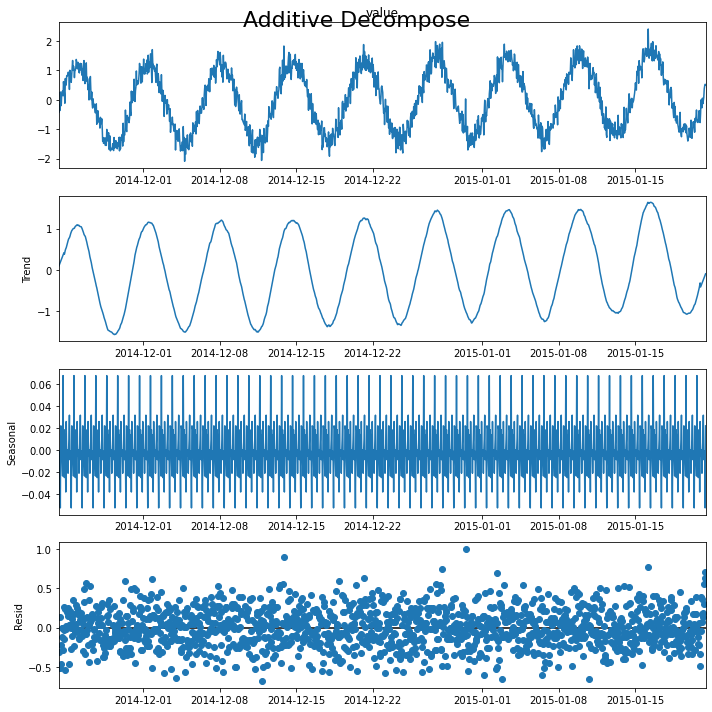



File: A2Benchmarksynthetic_24
threshold: 500
Actual Outliers: 1
                      value  is_anomaly
timestamp                              
2014-12-30 12:00:00  0.0314           1
Detected outliers: 29
Outliers:
timestamp
2014-11-25 19:00:00    0.563138
2014-11-26 04:00:00    0.524147
2014-11-29 09:00:00    0.597933
2014-12-01 20:00:00    0.613729
2014-12-04 16:00:00    0.506717
2014-12-07 20:00:00    0.532335
2014-12-13 11:00:00    0.506084
2014-12-13 12:00:00    0.536728
2014-12-13 18:00:00    0.556317
2014-12-13 21:00:00    0.891118
2014-12-18 21:00:00    0.589770
2014-12-20 11:00:00    0.540179
2014-12-21 04:00:00    0.632875
2014-12-27 18:00:00    0.550286
2014-12-28 03:00:00    0.540503
2014-12-28 09:00:00    0.741279
2014-12-30 12:00:00    0.999042
2015-01-02 10:00:00    0.693478
2015-01-03 01:00:00    0.540092
2015-01-04 18:00:00    0.543419
2015-01-11 19:00:00    0.503044
2015-01-13 11:00:00    0.504150
2015-01-14 00:00:00    0.526939
2015-01-14 11:00:00    0.517600
2015

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_25add_STL


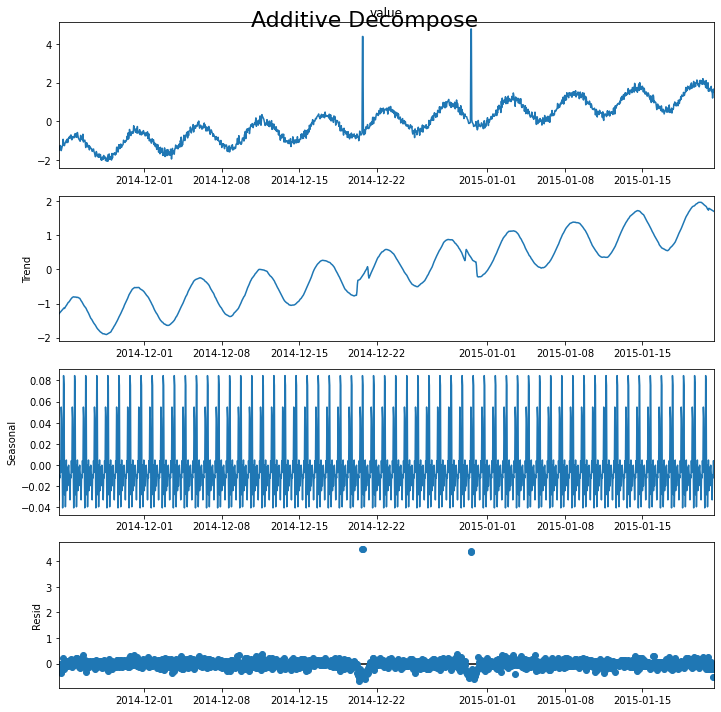



File: A2Benchmarksynthetic_25
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  4.382979           1
2014-12-20 18:00:00  4.382979           1
2014-12-30 12:00:00  4.771106           1
2014-12-30 13:00:00  4.771106           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    4.479447
2014-12-20 18:00:00    4.473660
2014-12-30 12:00:00    4.357858
2014-12-30 13:00:00    4.392092
Name: resid, dtype: float64
----------------
Mean: 677.021695, StandardDeviation: 1078.857833
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   330.577449           0
1    2014-11-23 08:00:00    -8.952793           0
2    2014-11-23 09:00:00   498.310024           0
3    2014-11-23 10:00:00   557.956500           0
4    2014-11-23 11:00:00   408.067961           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00  1159.791552           0
1417 2015-01-21 08:

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_26add_STL


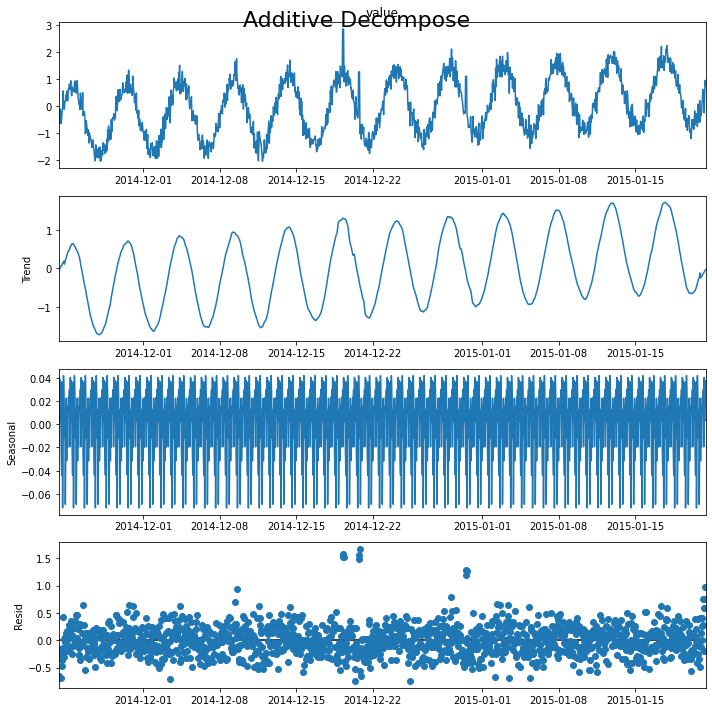



File: A2Benchmarksynthetic_26
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  2.853780           1
2014-12-19 07:00:00  2.853780           1
2014-12-19 08:00:00  2.853780           1
2014-12-20 17:00:00  1.265167           1
2014-12-20 18:00:00  1.265167           1
2014-12-20 19:00:00  1.265167           1
2014-12-30 12:00:00  1.101959           1
2014-12-30 13:00:00  1.101959           1
2014-12-30 14:00:00  1.101959           1
Detected outliers: 39
Outliers:
timestamp
2014-11-25 11:00:00    0.649922
2014-11-29 13:00:00    0.509870
2014-11-29 16:00:00    0.651173
2014-11-30 01:00:00    0.631780
2014-12-04 08:00:00    0.620682
2014-12-09 10:00:00    0.691914
2014-12-09 13:00:00    0.935120
2014-12-11 15:00:00    0.630923
2014-12-14 10:00:00    0.607359
2014-12-18 15:00:00    0.516726
2014-12-19 06:00:00    1.516674
2014-12-19 07:00:00    1.574884
2014-12-19 08:00:00    1.520253
2014-12-20 17:

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_27add_STL


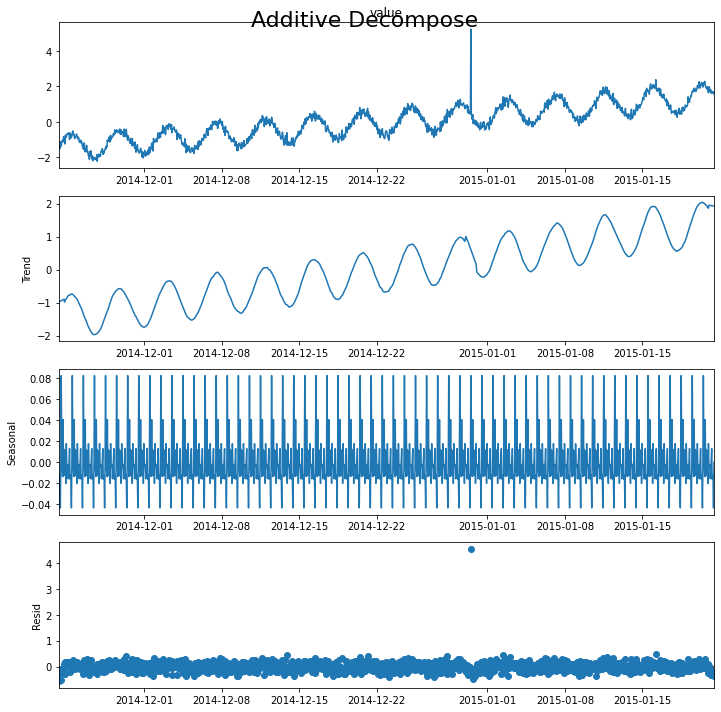



File: A2Benchmarksynthetic_27
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  5.229278           1
Detected outliers: 1
Outliers:
timestamp
2014-12-30 12:00:00    4.541667
Name: resid, dtype: float64
----------------
Mean: 9202.203480, StandardDeviation: 5383.176339
               timestamp         value  is_anomaly
0    2014-11-23 07:00:00    367.646826           0
1    2014-11-23 08:00:00    -38.283968           0
2    2014-11-23 09:00:00    467.681082           0
3    2014-11-23 10:00:00    492.157914           0
4    2014-11-23 11:00:00    291.684169           0
...                  ...           ...         ...
1416 2015-01-21 07:00:00  18310.202361           0
1417 2015-01-21 08:00:00  17394.768033           0
1418 2015-01-21 09:00:00  18197.660173           0
1419 2015-01-21 10:00:00  18605.443064           0
1420 2015-01-21 11:00:00  18269.717263           0

[1421 rows x 3 columns]


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_28add_STL


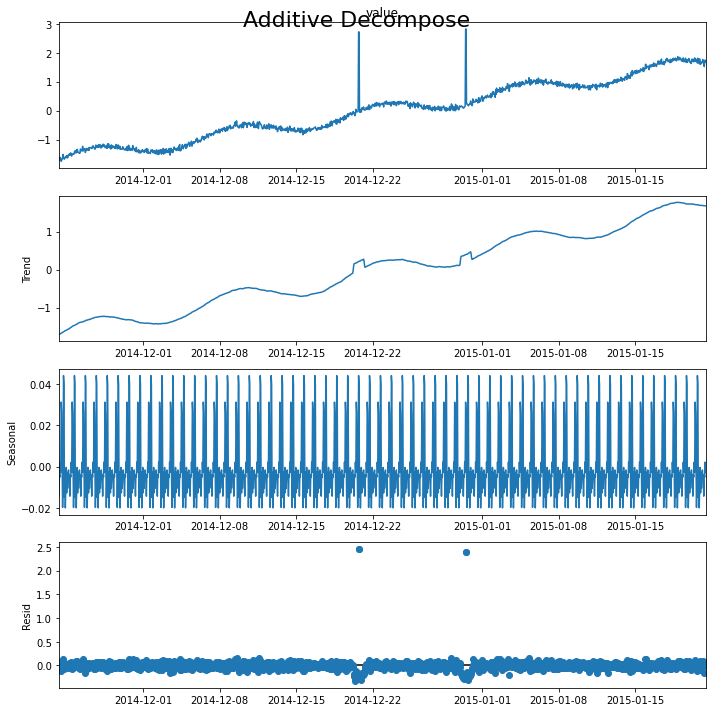



File: A2Benchmarksynthetic_28
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  2.716944           1
2014-12-20 18:00:00  2.716944           1
2014-12-30 12:00:00  2.818085           1
2014-12-30 13:00:00  2.818085           1
Detected outliers: 4
Outliers:
timestamp
2014-12-20 17:00:00    2.459186
2014-12-20 18:00:00    2.459552
2014-12-30 12:00:00    2.391466
2014-12-30 13:00:00    2.393025
Name: resid, dtype: float64
----------------
Mean: 853.154308, StandardDeviation: 1095.773774
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   368.696606           0
1    2014-11-23 08:00:00   -55.416317           0
2    2014-11-23 09:00:00   464.803666           0
3    2014-11-23 10:00:00   486.371135           0
4    2014-11-23 11:00:00   274.938478           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00  1646.262217           0
1417 2015-01-21 08:

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_29add_STL


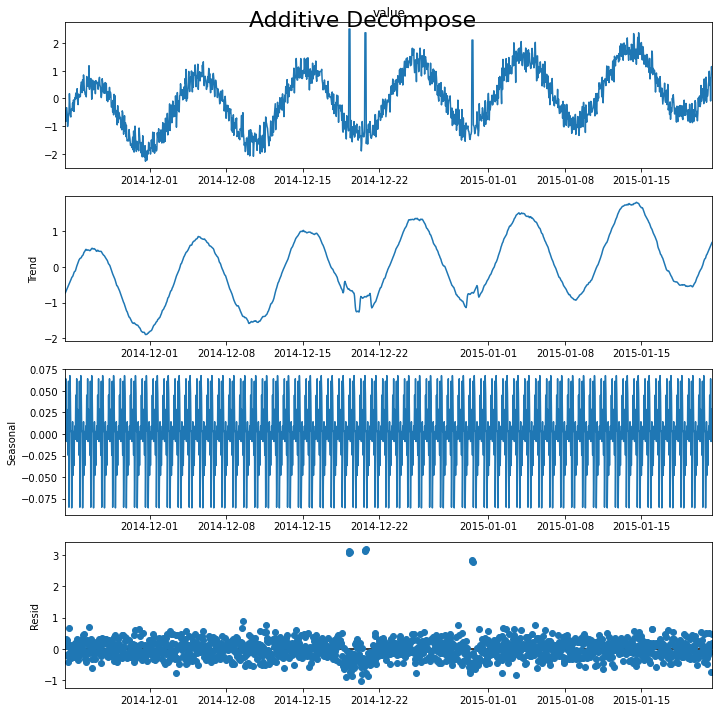



File: A2Benchmarksynthetic_29
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  2.506368           1
2014-12-19 07:00:00  2.506368           1
2014-12-19 08:00:00  2.506368           1
2014-12-20 17:00:00  2.369639           1
2014-12-20 18:00:00  2.369639           1
2014-12-20 19:00:00  2.369639           1
2014-12-30 12:00:00  2.106412           1
2014-12-30 13:00:00  2.106412           1
2014-12-30 14:00:00  2.106412           1
Detected outliers: 43
Outliers:
timestamp
2014-11-23 16:00:00    0.660854
2014-11-25 11:00:00    0.713651
2014-11-29 16:00:00    0.612984
2014-11-30 01:00:00    0.618318
2014-12-02 20:00:00    0.565982
2014-12-04 08:00:00    0.581557
2014-12-05 22:00:00    0.583048
2014-12-09 10:00:00    0.662057
2014-12-09 13:00:00    0.894954
2014-12-11 02:00:00    0.582609
2014-12-11 11:00:00    0.523226
2014-12-11 15:00:00    0.774846
2014-12-11 16:00:00    0.522154
2014-12-12 12:

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_3add_STL


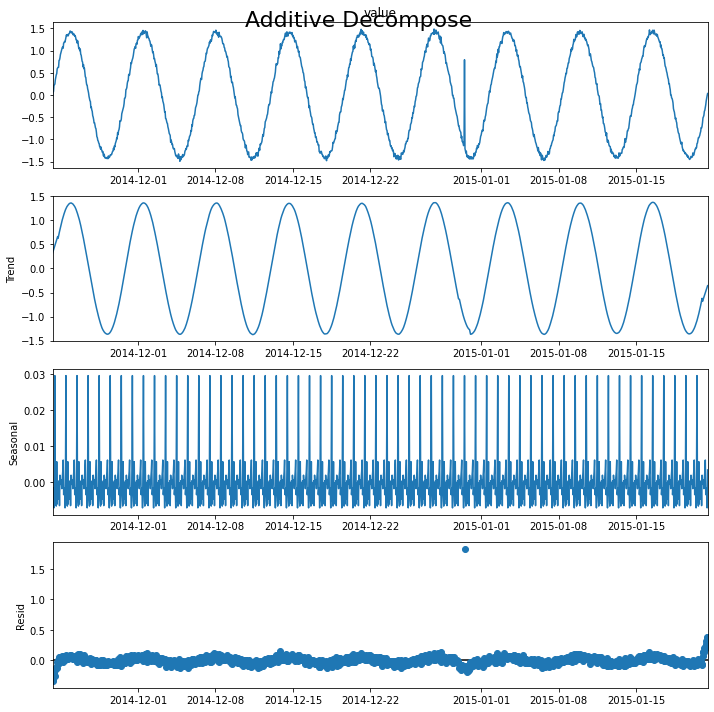



File: A2Benchmarksynthetic_3
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  0.794893           1
Detected outliers: 1
Outliers:
timestamp
2014-12-30 12:00:00    1.830217
Name: resid, dtype: float64
----------------
Mean: 5950.417354, StandardDeviation: 3552.981132
               timestamp         value  is_anomaly
0    2014-11-23 07:00:00   -180.280563           0
1    2014-11-23 08:00:00    118.292354           0
2    2014-11-23 09:00:00   -133.825972           0
3    2014-11-23 10:00:00    652.458040           0
4    2014-11-23 11:00:00    325.887404           0
...                  ...           ...         ...
1416 2015-01-21 07:00:00  11942.906157           0
1417 2015-01-21 08:00:00  12210.795268           0
1418 2015-01-21 09:00:00  12234.121089           0
1419 2015-01-21 10:00:00  12192.975338           0
1420 2015-01-21 11:00:00  12063.465718           0

[1421 rows x 3 columns]


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_30add_STL


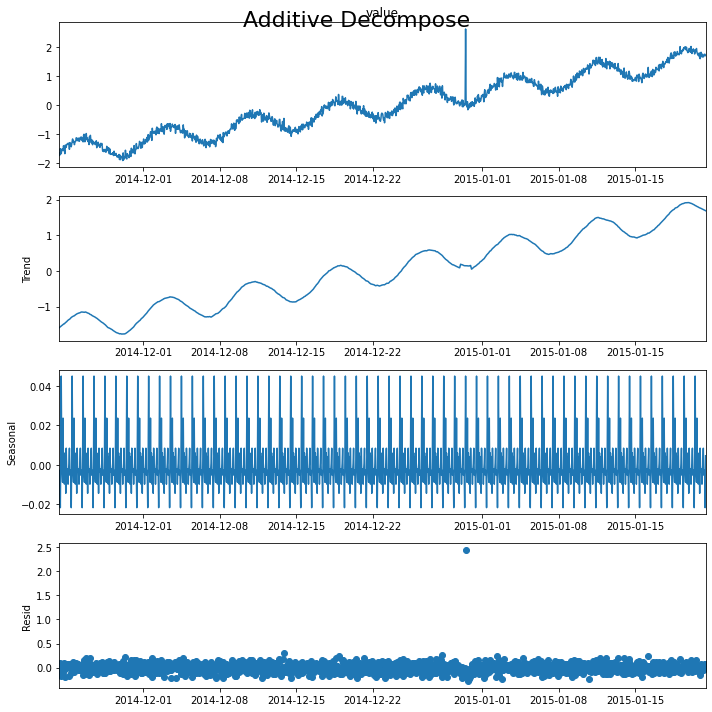



File: A2Benchmarksynthetic_30
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  2.638754           1
Detected outliers: 1
Outliers:
timestamp
2014-12-30 12:00:00    2.447457
Name: resid, dtype: float64
----------------
Mean: 959.394771, StandardDeviation: 1155.849408
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   394.123324           0
1    2014-11-23 08:00:00   -43.032020           0
2    2014-11-23 09:00:00   528.987760           0
3    2014-11-23 10:00:00   567.962720           0
4    2014-11-23 11:00:00   357.743117           0
...                  ...          ...         ...
1416 2015-01-21 07:00:00  1818.849690           0
1417 2015-01-21 08:00:00   878.892797           0
1418 2015-01-21 09:00:00  1841.014851           0
1419 2015-01-21 10:00:00  2366.046251           0
1420 2015-01-21 11:00:00  2068.291420           0

[1421 rows x 3 columns]


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_31add_STL


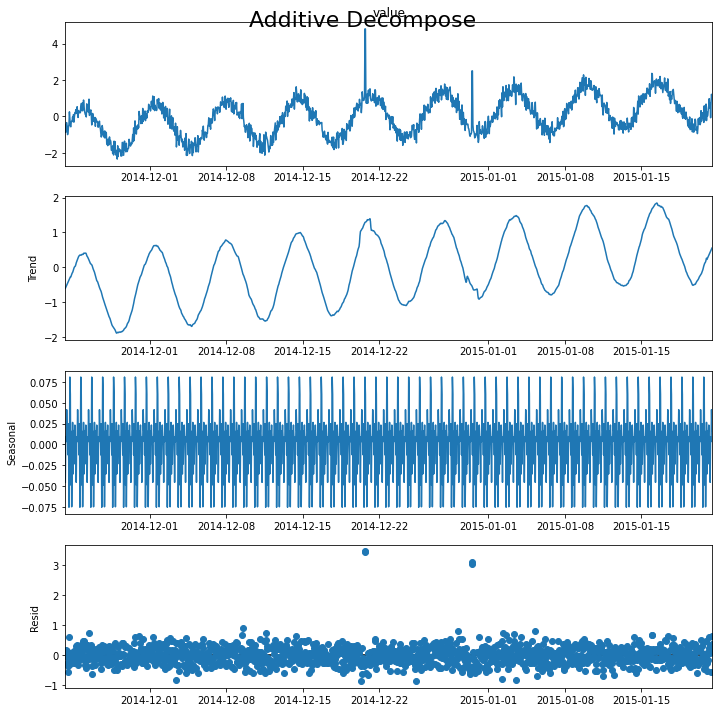



File: A2Benchmarksynthetic_31
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  4.810664           1
2014-12-20 18:00:00  4.810664           1
2014-12-30 12:00:00  2.504158           1
2014-12-30 13:00:00  2.504158           1
Detected outliers: 44
Outliers:
timestamp
2014-11-23 16:00:00    0.601638
2014-11-25 11:00:00    0.728642
2014-11-29 16:00:00    0.618920
2014-11-30 01:00:00    0.640955
2014-11-30 09:00:00    0.530632
2014-12-01 07:00:00    0.598285
2014-12-02 20:00:00    0.579578
2014-12-04 08:00:00    0.588821
2014-12-05 22:00:00    0.535320
2014-12-09 10:00:00    0.687937
2014-12-09 13:00:00    0.920031
2014-12-11 02:00:00    0.553476
2014-12-11 15:00:00    0.746885
2014-12-12 12:00:00    0.508204
2014-12-13 14:00:00    0.513233
2014-12-14 10:00:00    0.626519
2014-12-15 12:00:00    0.504377
2014-12-20 17:00:00    3.440724
2014-12-20 18:00:00    3.454416
2014-12-21 15:00:00    0.546483


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_32add_STL


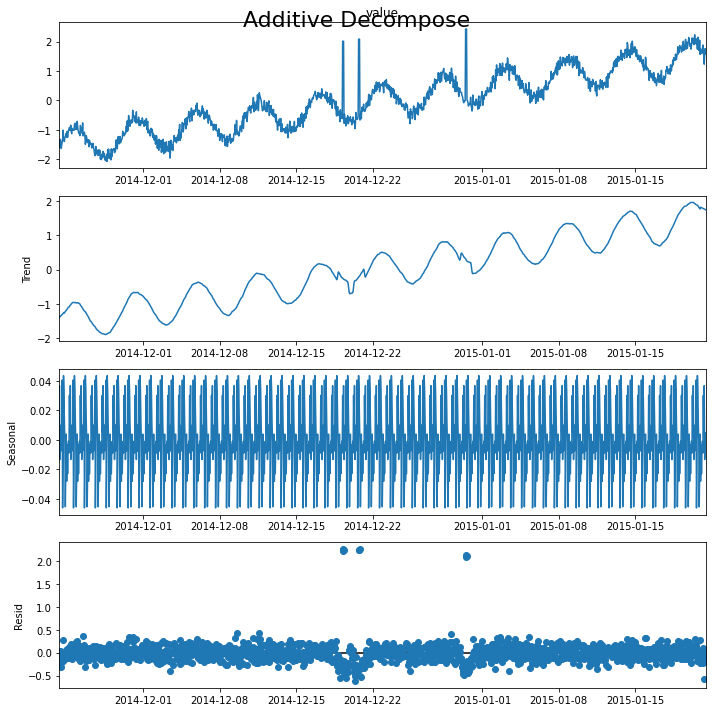



File: A2Benchmarksynthetic_32
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  2.011083           1
2014-12-19 07:00:00  2.011083           1
2014-12-19 08:00:00  2.011083           1
2014-12-20 17:00:00  2.082462           1
2014-12-20 18:00:00  2.082462           1
2014-12-20 19:00:00  2.082462           1
2014-12-30 12:00:00  2.426199           1
2014-12-30 13:00:00  2.426199           1
2014-12-30 14:00:00  2.426199           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    2.225130
2014-12-19 07:00:00    2.268422
2014-12-19 08:00:00    2.250446
2014-12-20 17:00:00    2.251123
2014-12-20 18:00:00    2.249546
2014-12-20 19:00:00    2.256528
2014-12-30 12:00:00    2.098356
2014-12-30 13:00:00    2.131279
2014-12-30 14:00:00    2.112369
Name: resid, dtype: float64
----------------
Mean: 533.967462, StandardDeviation: 1069.884522
               timestamp        value  is_anomaly

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_33add_STL


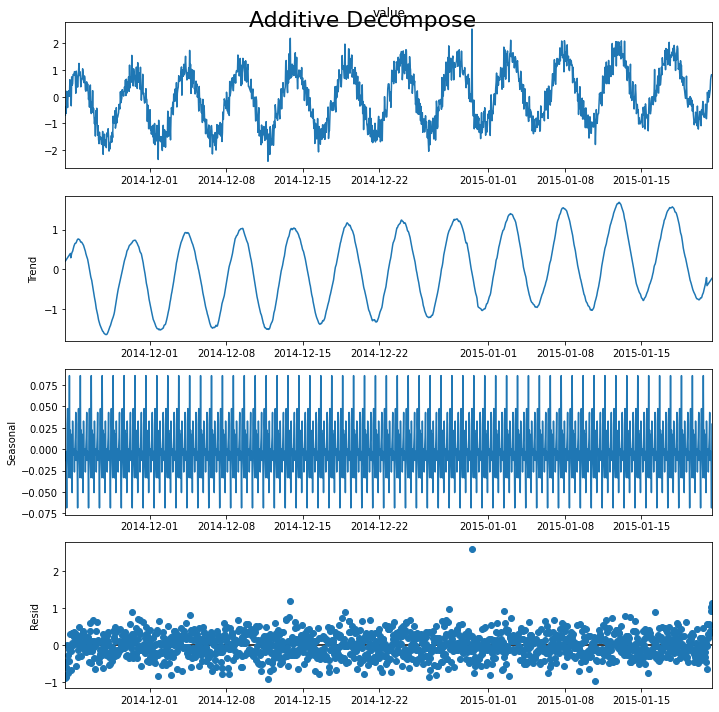



File: A2Benchmarksynthetic_33
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  2.540857           1
Detected outliers: 84
Outliers:
timestamp
2014-11-25 14:00:00    0.600060
2014-11-25 19:00:00    0.684625
2014-11-26 04:00:00    0.612549
2014-11-29 04:00:00    0.579407
2014-11-29 09:00:00    0.897084
                         ...   
2015-01-21 07:00:00    0.553591
2015-01-21 08:00:00    0.909445
2015-01-21 09:00:00    1.030441
2015-01-21 10:00:00    1.141206
2015-01-21 11:00:00    1.002848
Name: resid, Length: 84, dtype: float64
----------------
Mean: 2873.685166, StandardDeviation: 1957.027297
               timestamp        value  is_anomaly
0    2014-11-23 07:00:00   434.656572           0
1    2014-11-23 08:00:00   -19.688669           0
2    2014-11-23 09:00:00   632.288066           0
3    2014-11-23 10:00:00   699.399314           0
4    2014-11-23 11:00:00   492.677880           0
...    

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_34add_STL


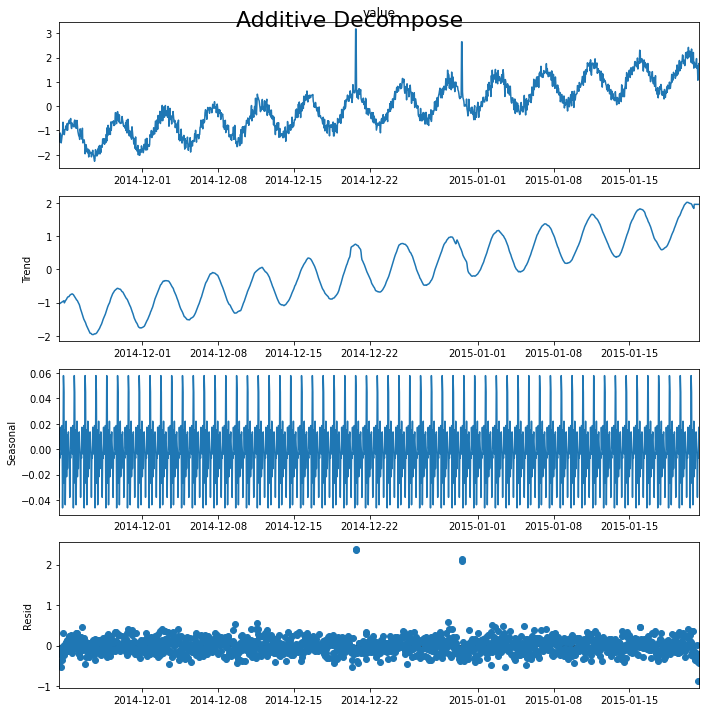



File: A2Benchmarksynthetic_34
threshold: 500
Actual Outliers: 4
                        value  is_anomaly
timestamp                                
2014-12-20 17:00:00  3.175623           1
2014-12-20 18:00:00  3.175623           1
2014-12-30 12:00:00  2.648310           1
2014-12-30 13:00:00  2.648310           1
Detected outliers: 8
Outliers:
timestamp
2014-12-09 13:00:00    0.528567
2014-12-11 15:00:00    0.564329
2014-12-20 17:00:00    2.363915
2014-12-20 18:00:00    2.387377
2014-12-29 05:00:00    0.569166
2014-12-30 12:00:00    2.076552
2014-12-30 13:00:00    2.133641
2015-01-02 08:00:00    0.513981
Name: resid, dtype: float64
----------------
Mean: 11410.899789, StandardDeviation: 7069.718250
               timestamp         value  is_anomaly
0    2014-11-23 07:00:00    458.901115           0
1    2014-11-23 08:00:00    -55.425325           0
2    2014-11-23 09:00:00    569.309498           0
3    2014-11-23 10:00:00    592.617923           0
4    2014-11-23 11:00:00    334.94

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_35add_STL


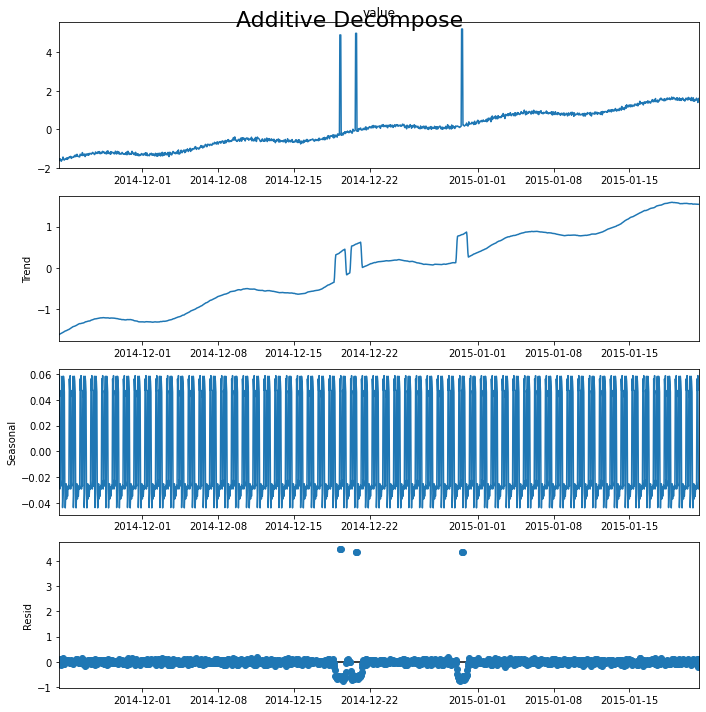



File: A2Benchmarksynthetic_35
threshold: 500
Actual Outliers: 9
                        value  is_anomaly
timestamp                                
2014-12-19 06:00:00  4.892303           1
2014-12-19 07:00:00  4.892303           1
2014-12-19 08:00:00  4.892303           1
2014-12-20 17:00:00  4.977022           1
2014-12-20 18:00:00  4.977022           1
2014-12-20 19:00:00  4.977022           1
2014-12-30 12:00:00  5.200080           1
2014-12-30 13:00:00  5.200080           1
2014-12-30 14:00:00  5.200080           1
Detected outliers: 9
Outliers:
timestamp
2014-12-19 06:00:00    4.465019
2014-12-19 07:00:00    4.468640
2014-12-19 08:00:00    4.449730
2014-12-20 17:00:00    4.346615
2014-12-20 18:00:00    4.347828
2014-12-20 19:00:00    4.352873
2014-12-30 12:00:00    4.349485
2014-12-30 13:00:00    4.351485
2014-12-30 14:00:00    4.334026
Name: resid, dtype: float64
----------------
Processing index: 30 of 100
Mean: 634.296881, StandardDeviation: 1095.076584
               timest

C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)





A2Benchmark_A2Benchmarksynthetic_36add_STL


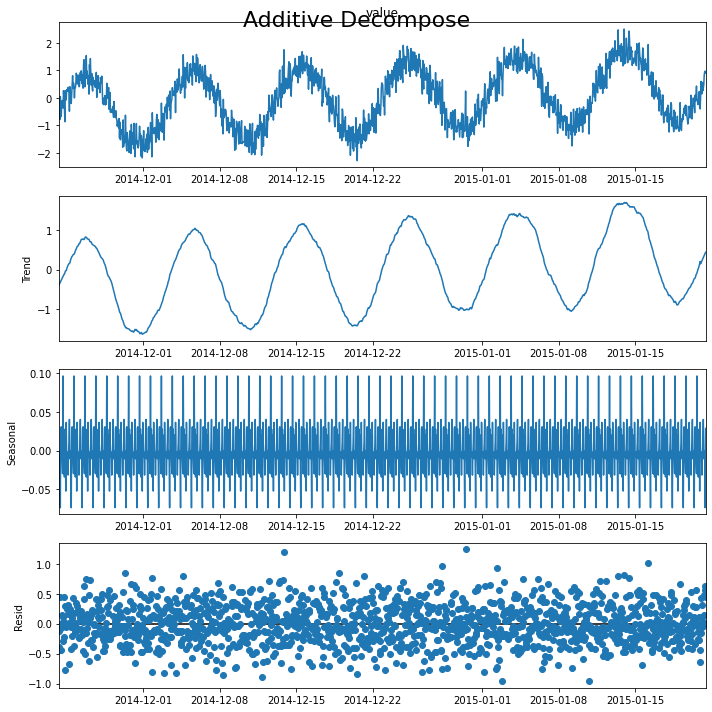



File: A2Benchmarksynthetic_36
threshold: 500
Actual Outliers: 1
                        value  is_anomaly
timestamp                                
2014-12-30 12:00:00  0.250416           1
Detected outliers: 93
Outliers:
timestamp
2014-11-25 14:00:00    0.634176
2014-11-25 19:00:00    0.753635
2014-11-26 04:00:00    0.723792
2014-11-27 20:00:00    0.567187
2014-11-29 04:00:00    0.522568
                         ...   
2015-01-19 03:00:00    0.663696
2015-01-20 03:00:00    0.530601
2015-01-20 15:00:00    0.569722
2015-01-21 09:00:00    0.560921
2015-01-21 10:00:00    0.631954
Name: resid, Length: 93, dtype: float64
----------------
STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:25.505655
[0.7272727272727273, 1.0, 1.0, 0.782608695652174, 0.25, 0.7272727272727273, 0.782608695652174, 0.6666666666666666, 0.7272727272727273, 0.6923076923076924, 1.0, 0.3076923076923077, 0.782608695652174, 1.0, 1.0, 0.3076923076923077, 0.782608695652174, 0.06666666

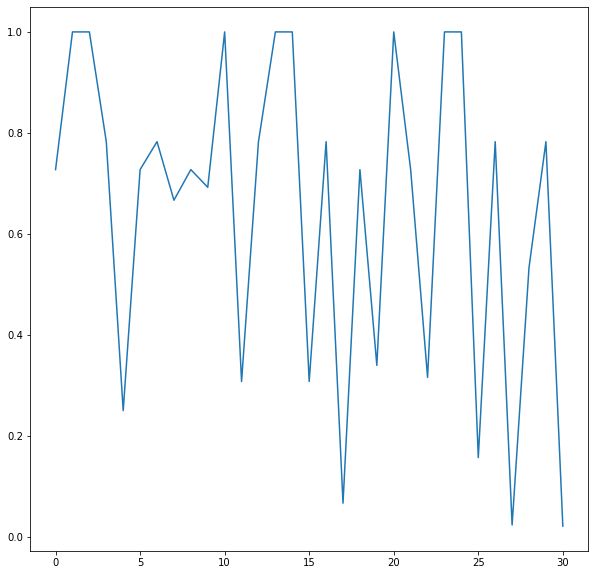

In [ ]:
start_time = datetime.now() 
f1_plot = []
for index,file in enumerate(all_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 30:
        break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    
    # prepare data for standardization
    values = df_indexed.copy()
    values = values.drop(columns=['is_anomaly'],axis=1)
    #values = values.reshape((len(values), 1))
    
    # train the standardization
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values)
    print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
    # standardize the dataset
    standardaized = scaler2.transform(values)
    
    #jugaad, should change so that standardized is used from here on.
    for i in range(len(df_indexed)):
        df_indexed['value'].iloc[i] = standardaized[i]
        
    print(df)
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    #plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A2Benchmark_" + fname +"add_STL")
    print("\n\n\nA2Benchmark_" + fname +"add_STL")
    plt.show()
    
    
    threshold=0.5
    
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    
    not_outliers = residualdf[residualdf < threshold]
    anomalies = df_indexed.join(outliers,on='timestamp',how='inner')
    not_anomalies = df_indexed.join(not_outliers,on='timestamp',how='inner')
    
    p = df_indexed.loc[df_indexed['is_anomaly'] == 1]
    
    n = df_indexed.loc[df_indexed['is_anomaly'] == 0]
    
    truepositives = anomalies.loc[anomalies['is_anomaly'] == 1]
    
    falsepositives = anomalies.loc[anomalies['is_anomaly'] == 0]
    
    truenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 0]
    
    falsenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 1]
    
    #Traditional FPR and TPR formmulae
    #tpr = truepositives.count()/(truepositives.count() + falsenegatives.count())
    #fpr = falsepositives.count()/(falsepositives.count() + truenegatives.count())
    
    #IDEAL Paper based TRP/FPR rates
    fpr = len(falsepositives)/len(n)
    tpr = len(truepositives)/len(p)
    fnr = 1-tpr
    tnr = 1-fpr
    
    precision = len(truepositives)/(len(truepositives) + len(falsepositives))
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    
    f1 = 2 * (precision * recall)/(precision + recall)
    f1_plot.append(f1)
    
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        file.write("\n\n\n Statistics:")
        file.write(f"\ntrue positives:{len(truepositives)}")
        file.write(f"\nfalse positives:{len(falsepositives)}")
        file.write(f"\ntrue negatives:{len(truenegatives)}")
        file.write(f"\nfalse negatives:{len(falsenegatives)}")
        file.write(f"\nFPR:{fpr}")
        file.write(f"\nTPR:{tpr}")
        file.write(f"\nFNR:{fnr}")
        file.write(f"\nTNR:{tnr}")
        
        file.write(f"\nPrecision:{precision}")
        file.write(f"\nREcall:{recall}")
        file.write(f"\nF1:{f1}")
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Actual Outliers:", len(p))
    print(p)
    print("Detected outliers:", len(outliers))
    print("Outliers:")
    print(outliers)
    print("----------------")
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
print(f1_plot)
plt.plot(f1_plot)

In [ ]:
print(sum(f1_plot)/len(f1_plot))

0.6455953436269912


In [ ]:
residualdf.mean()

0.0008207124598037187

In [ ]:
residualdf.std()

0.3302331716379146

In [ ]:
upper_threshold = residualdf.mean() + residualdf.std()
lower_threshold = residualdf.mean() - residualdf.std()
upper_threshold, lower_threshold

## A1 Folder - real Yahoo server traffic dataset

In [ ]:
a1_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/**/*.csv', recursive=True)
start_time = datetime.now() 
print(f'Loaded the paths of {len(a1_csv)} files from disk. Begin processing at: {start_time}')
for index,file in enumerate(a1_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(a1_csv)}')
    if index > 50:
         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A1Benchmark_" + fname +"_add_STL")
    print("\n\n\nA1Benchmark_" + fname +"_add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A1 Benchmark processing complete. Time taken:{end_time-start_time}")

## A3 Folder - Synthetic data with outliers specified

In [ ]:
a3_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark/A3Benchmark-TS*.csv', recursive=True)
start_time = datetime.now() 
for index,file in enumerate(a3_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(a3_csv)}')
    if index > 50:
         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A3Benchmark_" + fname +"_add_STL")
    print("\n\n\nA3Benchmark_" + fname +"_add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A3 Benchmark processing complete. Time taken:{end_time-start_time}")

## A4 Folder - Synthetic data with outliers, changepoints and seasonalities.

In [ ]:
a4_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark/A4Benchmark-TS*.csv', recursive=True)
start_time = datetime.now() 
for index,file in enumerate(all_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 50:
         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A4Benchmark_" + fname +"_add_STL")
    print("\n\n\nA4Benchmark_" + fname +"_add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A4 Benchmark processing complete. Time taken:{end_time-start_time}")

# Extracting useful features from Time-Series

it is possible to use and derive various features from time-series. we can use these features to compare time series and post-comparison: we can detect any anomalous records/subsequences.

![Image of Features](./img/features.png)

References 78 and 79 deal with this: 78 offers a comparison between time series using a combination of PCA on the abovementioned features and then uses a multidimensional outlier detection 

to be able to incorporate these features, we must first extract them. acc to the authors of [78], their code included on open source R package on CRAM to automatically extract all the abovementioned features. We can use this library in python via the rpy2 package 

In [2]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [3]:
import rpy2
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter

def extract_features(timeseries):
    try:
        oddstream=importr('oddstream')
    except:
        ro.r(f'install.packages("oddstream")')
        oddstream = importr('oddstream')

    #r_timeseries = pandas2ri.py2ri(timeseries)
    with localconverter(ro.default_converter + pandas2ri.converter):
        for col in timeseries.columns.values:
            timeseries[col]=timeseries[col].astype(str) 
        #r_timeseries = ro.conversion.py2rpy(timeseries)
        features=oddstream.extract_tsfeatures(timeseries)
        #features= ro.conversion.rpy2py(features)
        return features
    return []


In [4]:
df_indexed

NameError: ignored

In [ ]:
features = extract_features(df_indexed)
print(features)

This matrix contains all the needed values except Season, Peak, Trough, and Trend. We can try to get these 

In [ ]:
type(features)

In [ ]:
tsfeatures1  = pandas2ri.ri2py(features)
tsfeatures1

In the above array, the first row contains the values for the value column, and the second for the is_anomaly column

In [ ]:
type(pandas2ri.ri2py(features))

In [ ]:
tsfeatures1[0,0]

In [ ]:
result_add